### Imports and Initialization

In [2]:
# coding=utf-8
%matplotlib inline
import csv
import sqlite3
import os
import re
import errno
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pylab import *
import datetime
import pandas as pd

path_dataset = "/home/mushtaq/monarcha/MonarchaData/"
path_organized_dataset = "organized_data/"
persons = ["p0101","p0102","p0201","p0202","p0302","p0402","p0502","p0602","p0702","p0802","p0902","p1002","p2101","p2102","p2201","p2202","p2301","p2302","p2401","p2402","p2501","p2601"]

### Helper methods

In [3]:
'''
Returns the list of all people from the dataset
'''
def make_list_of_persons(path):
        output = [dI for dI in os.listdir(path) if os.path.isdir(os.path.join(path, dI))]
        return output
    
def PrintException():
    exc_type, exc_obj, tb = sys.exc_info()
    f = tb.tb_frame
    lineno = tb.tb_lineno
    filename = f.f_code.co_filename
    linecache.checkcache(filename)
    line = linecache.getline(filename, lineno, f.f_globals)
    print('EXCEPTION IN ({}, LINE {} "{}"): {}').format(filename, lineno, line.strip(), exc_obj)

'''Returns the 3 matplotlib axis for datapoints having 3 dimentions'''
def three_scales(ax1,ax2, ax3, time, data1, data2, data3, c1, c2, c3):
    
    #ax2 = ax1.twinx()
    #ax3 = ax1.twinx()

    ax1.scatter(time, data1, color=c1)
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('x-axis')

    ax2.scatter(time, data2, color=c2)
    ax2.set_ylabel('y-axis')
    
    ax3.scatter(time, data3, color=c3)
    ax3.set_ylabel('z-axis')
    return ax1, ax2, ax3

'''Creates a plot of time vs data for data having 3 dimentions'''
def plot_3_axis(timestamp, x, y, z):
    fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=False, sharey=False)
    fig.set_size_inches(20, 15)
    ax1, ax2, ax3 = three_scales(ax1, ax2, ax3, timestamp, x, y, z, 'r', 'b', 'g')
    
    # Choose your xtick format string
    date_fmt = '%d-%m-%y %H:%M:%S'

    # Use a DateFormatter to set the data to the correct format.
    date_formatter = mdates.DateFormatter(date_fmt)
    ax1.xaxis.set_major_formatter(date_formatter)
    ax2.xaxis.set_major_formatter(date_formatter)
    ax3.xaxis.set_major_formatter(date_formatter)


    # Sets the tick labels diagonal so they fit easier.
    fig.autofmt_xdate()
    
    color_y_axis(ax1, 'r')
    color_y_axis(ax2, 'b')
    color_y_axis(ax3, 'g')
    
    plt.autoscale(enable=True, axis='x')
    
    plt.scatter
    plt.show()

    
# Change color of each axis
def color_y_axis(ax, color):
    """Color your axes."""
    for t in ax.get_yticklabels():
        t.set_color(color)
    return None

'''Plots single dimention data vs time'''
def plot_data(timestamp, data, label):

        fig, ax = plt.subplots()
        fig.set_size_inches(20, 3)
        ax.plot_date(timestamp, data)
        ax.set_xlabel('time')
        ax.set_ylabel(label)

        # Choose your xtick format string
        date_fmt = '%d-%m-%y %H:%M:%S'

        # Use a DateFormatter to set the data to the correct format.
        date_formatter = mdates.DateFormatter(date_fmt)
        ax.xaxis.set_major_formatter(date_formatter)

        # Sets the tick labels diagonal so they fit easier.
        fig.autofmt_xdate()

        plt.show()
        
def scatter_plot(data):
    fig, ax = plt.subplots()
    ax.scatter(np.linspace(-1, 1, 50), data)
    plt.show()

### Methods to plot individual features

In [4]:
def load_acc():
        data = pd.read_csv("organized_data/p0101/ACC.txt", error_bad_lines=False, sep=",", header=None, names=["sensor_time", "timestamp", "x","y","z"])
        #sensor_time, timestamp, x,y,z = np.genfromtxt("organized_data/p0101/ACC.txt", delimiter= ',', unpack=True, 
        #                                              loose=True , filling_values = '0' )
        #sensor_time, timestamp, x,y,z = np.loadtxt("organized_data/p0101/ACC.txt", delimiter= ',', unpack=True)
        #sensor_time, timestamp, x,y,z = np.loadtxt("test_acc.txt", unpack=True)
        timestamp = data["timestamp"] / 1000
        timestamp = mdates.epoch2num(timestamp)
        #print("timestamps:")
        #print(timestamp)
        #plot_data(timestamp, data["x"])
        plot_3_axis(timestamp, data["x"], data["y"], data["z"])
        
def load_mag():
        data = pd.read_csv("organized_data/p0101/MAG_min.txt", error_bad_lines=False, sep=",", header=None, names=["sensor_time", "timestamp", "x","y","z"])
        #sensor_time, timestamp, x,y,z = np.genfromtxt("organized_data/p0101/ACC.txt", delimiter= ',', unpack=True, 
        #                                              loose=True , filling_values = '0' )
        #sensor_time, timestamp, x,y,z = np.loadtxt("organized_data/p0101/ACC.txt", delimiter= ',', unpack=True)
        #sensor_time, timestamp, x,y,z = np.loadtxt("test_acc.txt", unpack=True)
        timestamp = data["timestamp"] / 1000
        timestamp = mdates.epoch2num(timestamp)
        #print("timestamps:")
        #print(timestamp)
        #plot_data(timestamp, data["x"])
        plot_3_axis(timestamp, data["x"], data["y"], data["z"])
        
def load_bat():
    data = pd.read_csv("organized_data/p0101/BAT.txt", sep=",", error_bad_lines=False, header=None, names=["timestamp", "level", "absolute_max","temperature","voltage"])
    timestamp = data["timestamp"] / 1000
    timestamp = mdates.epoch2num(timestamp)
    plot_data(timestamp, data["level"], "Battery-level (out of 100)")
    plot_data(timestamp, data["temperature"], "Battery-temperature")
    plot_data(timestamp, data["voltage"], "Battery-voltage")
    

### Accelerometer data

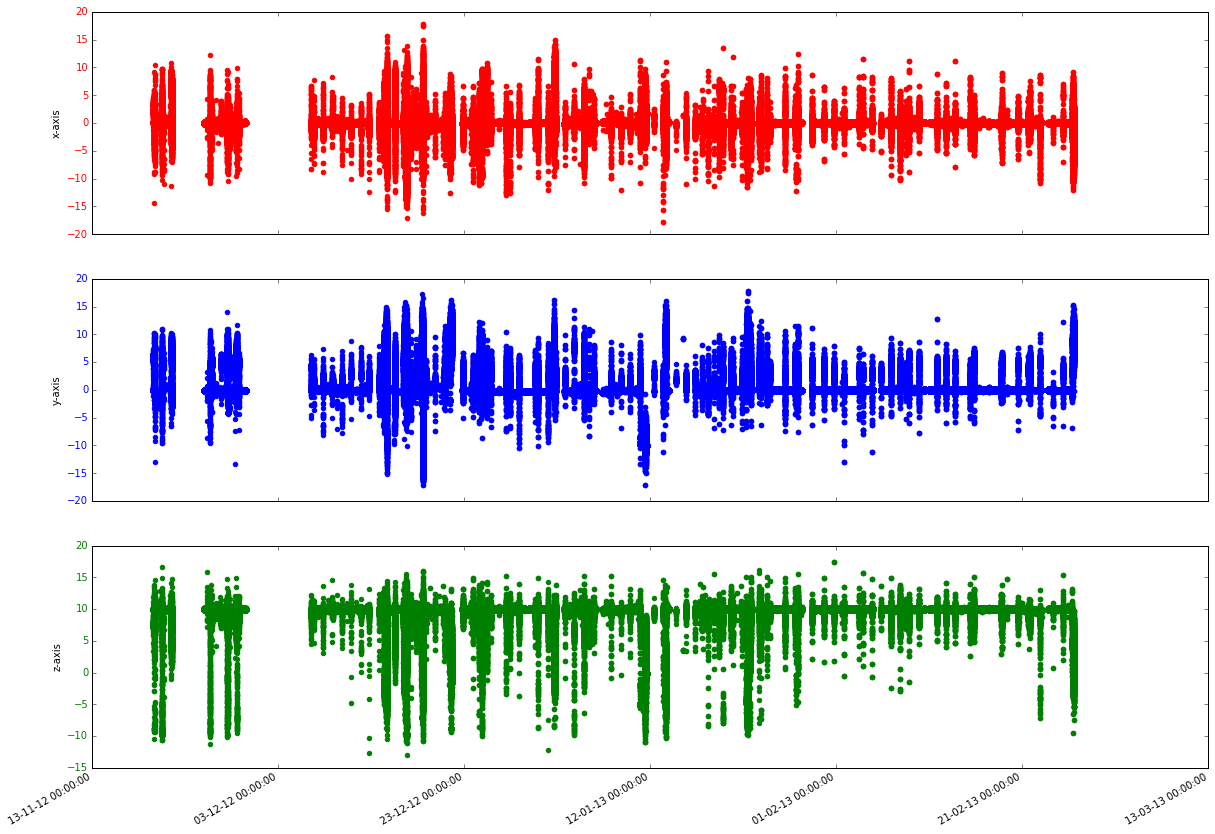

In [105]:
load_acc()

### Magnetometer data

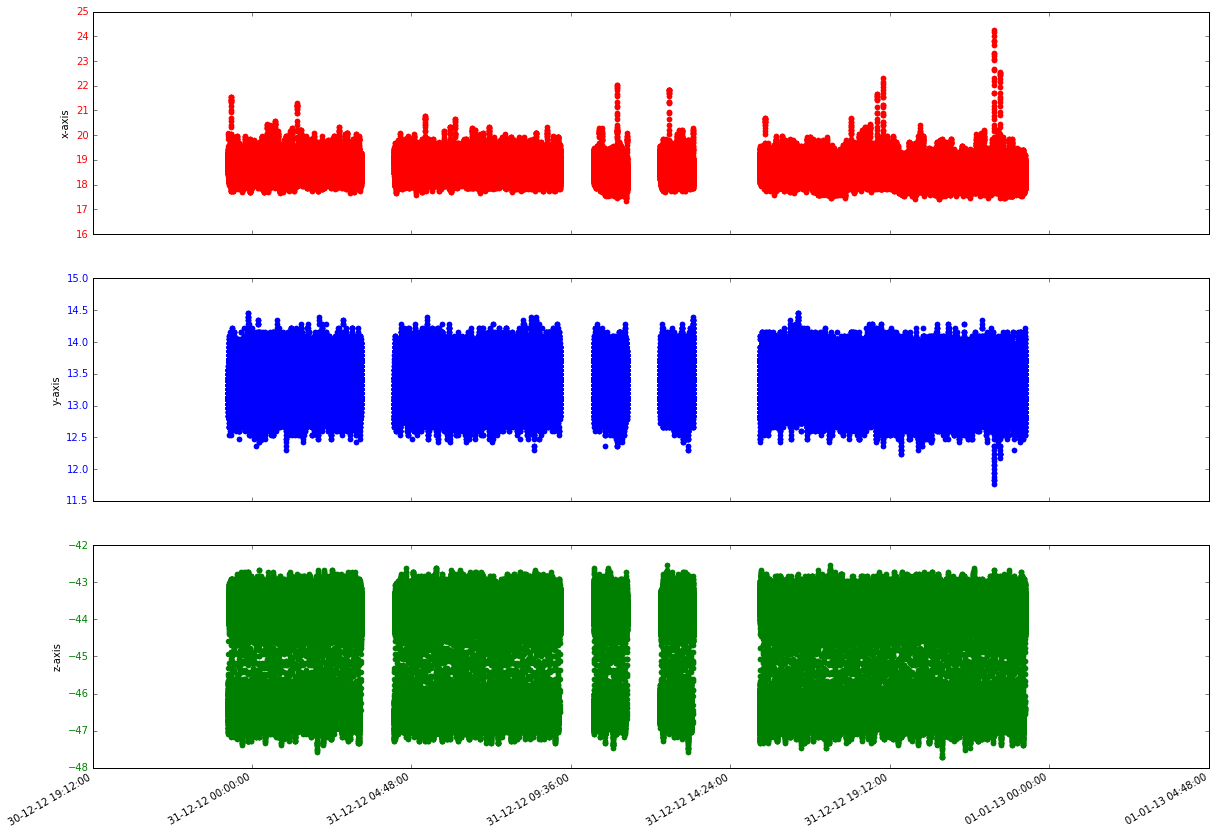

In [11]:
load_mag()

### Battery Status (level, temperature and voltage)

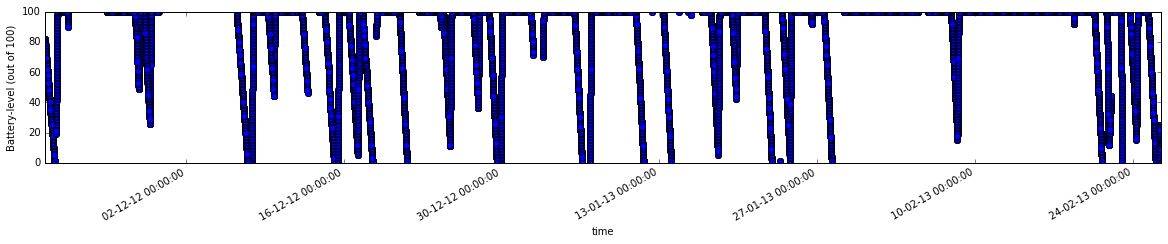

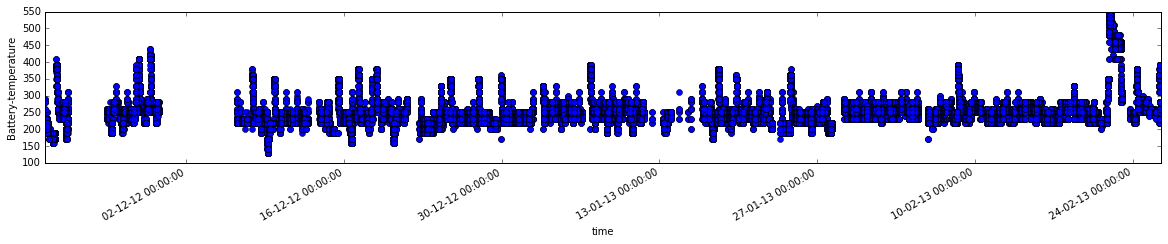

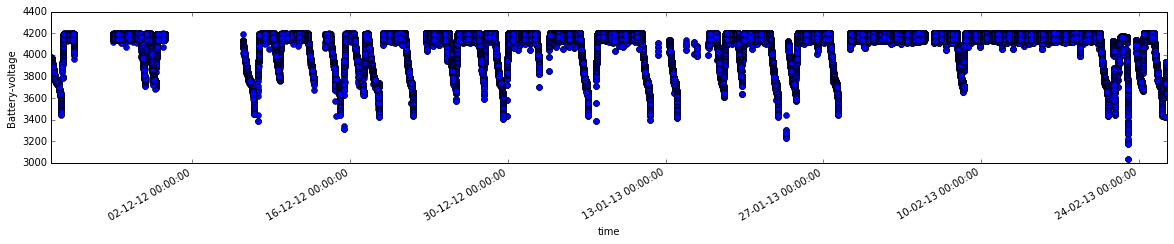

In [107]:
load_bat()

### Location data availability

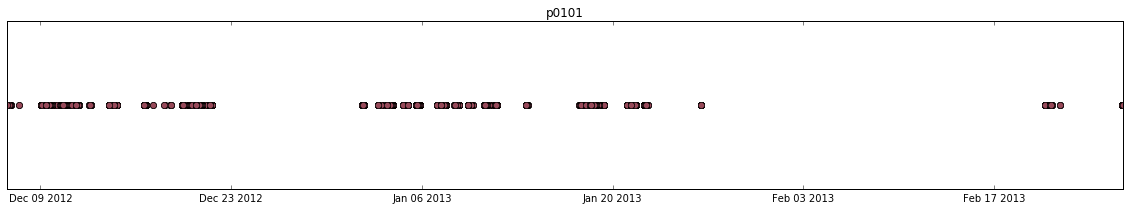

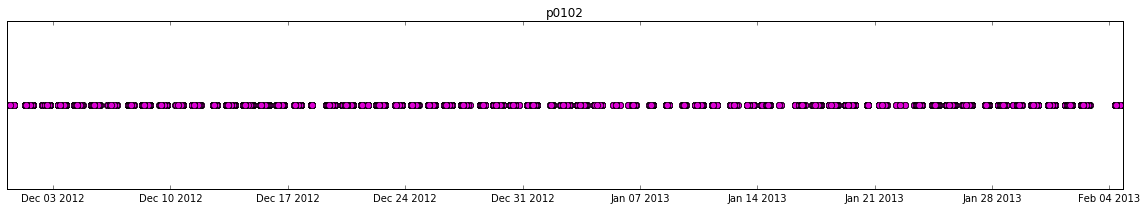

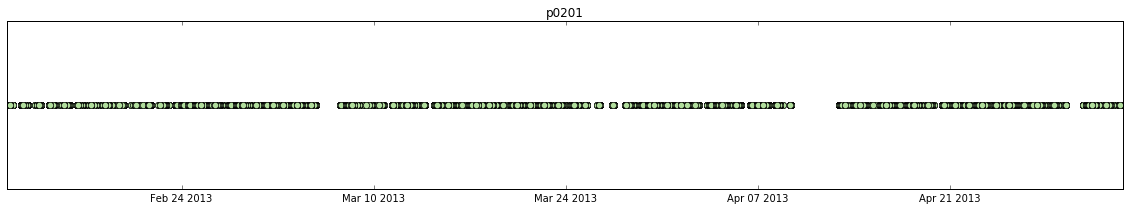

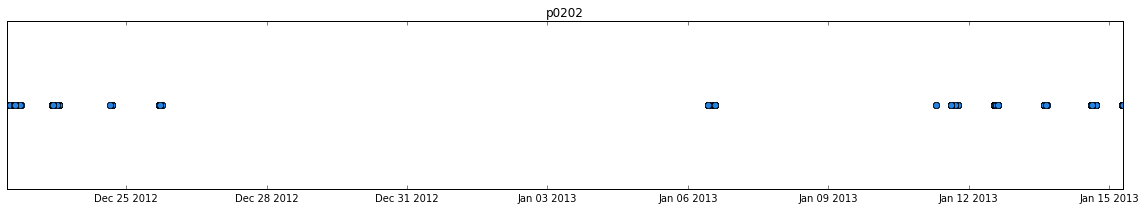

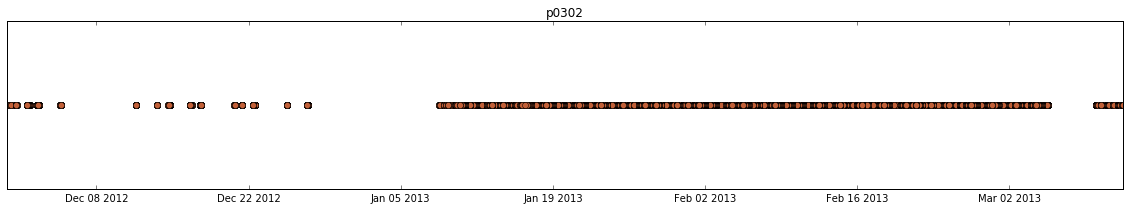

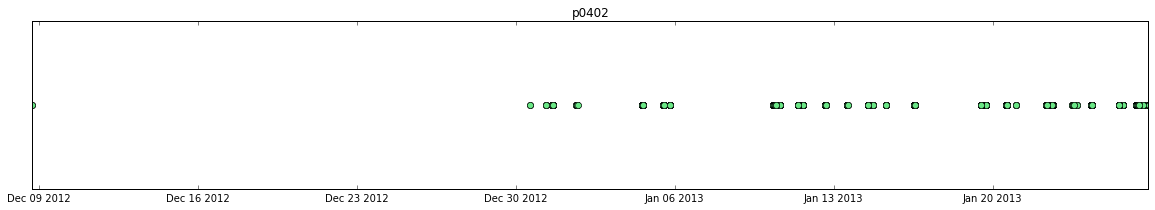

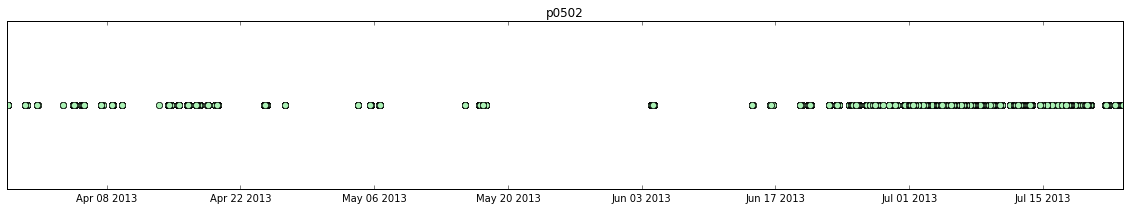

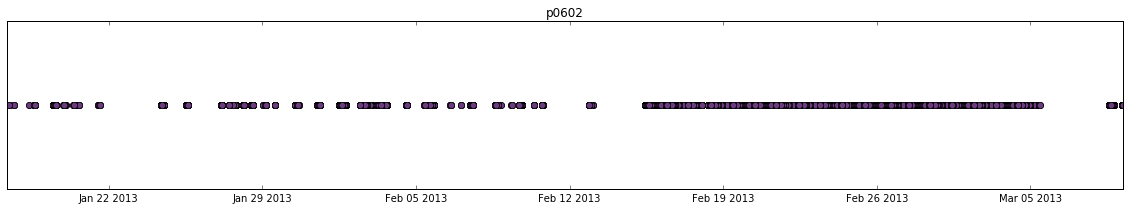

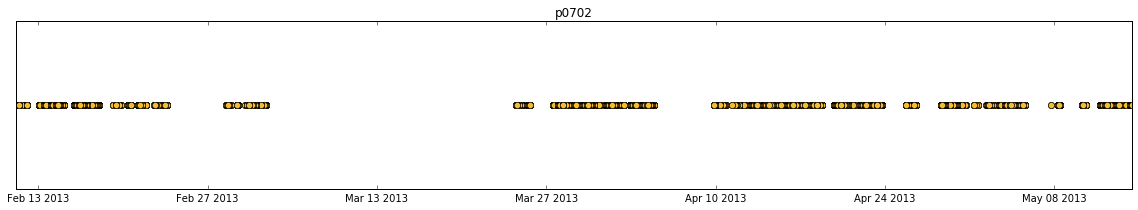

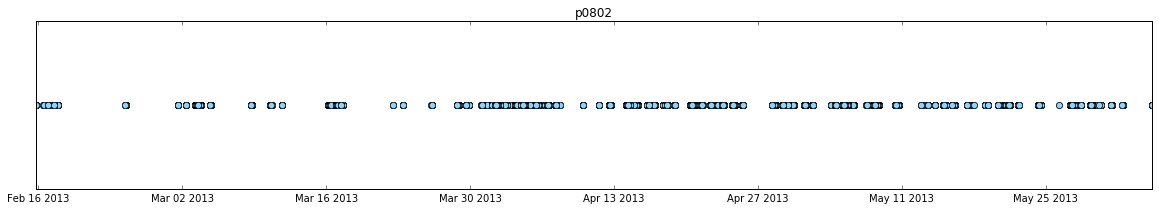

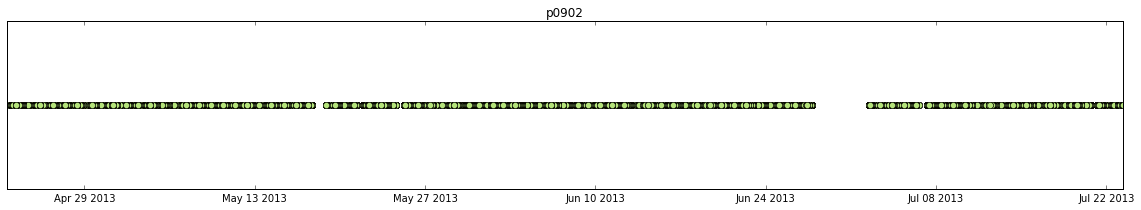

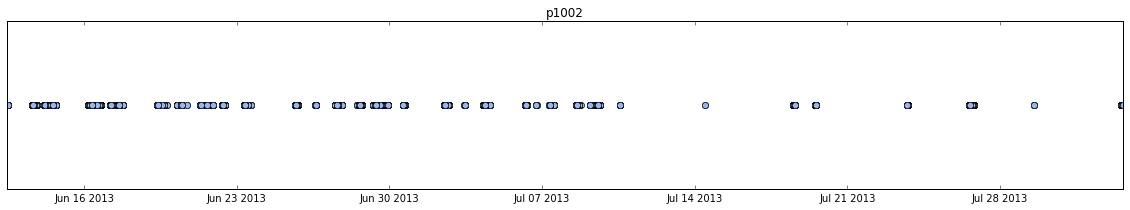

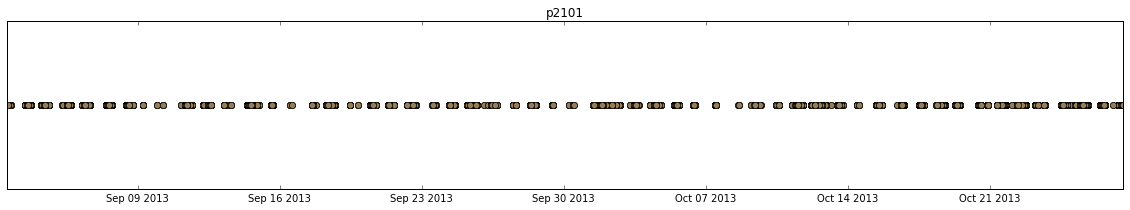

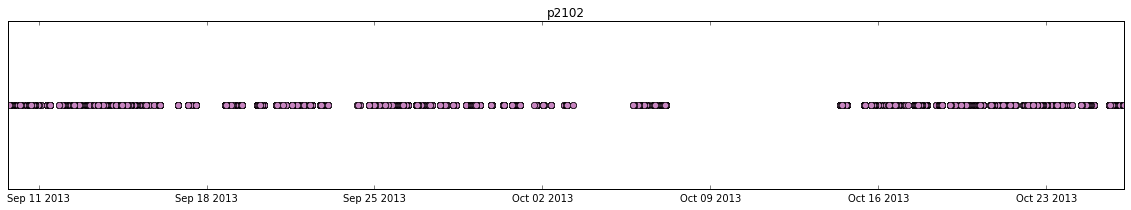

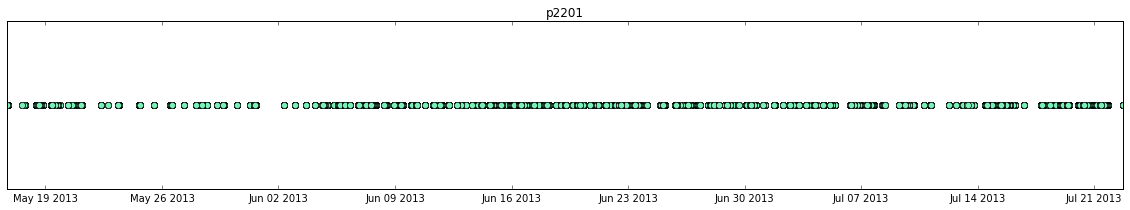

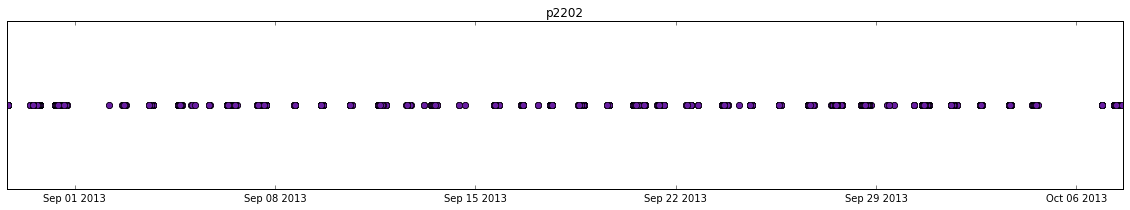

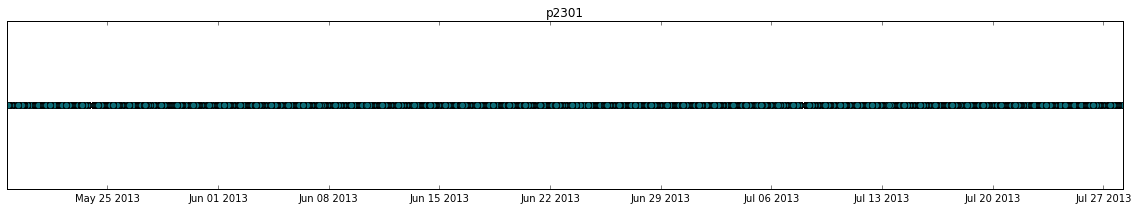

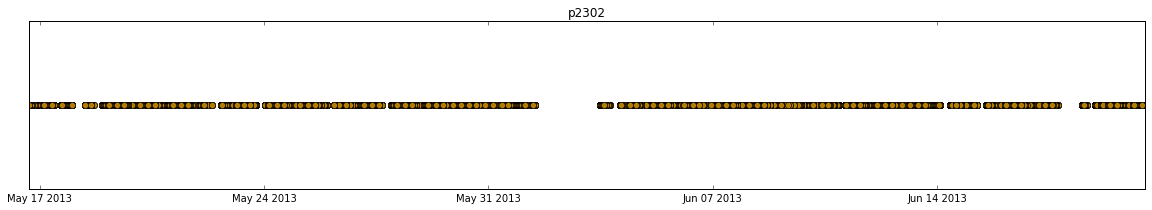

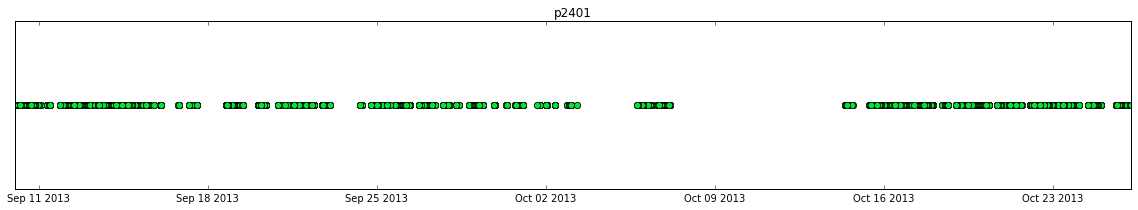

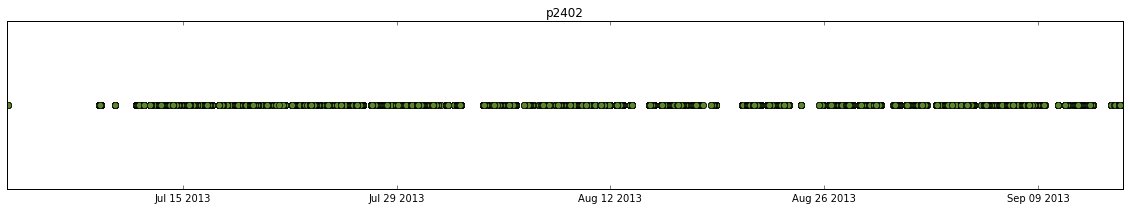

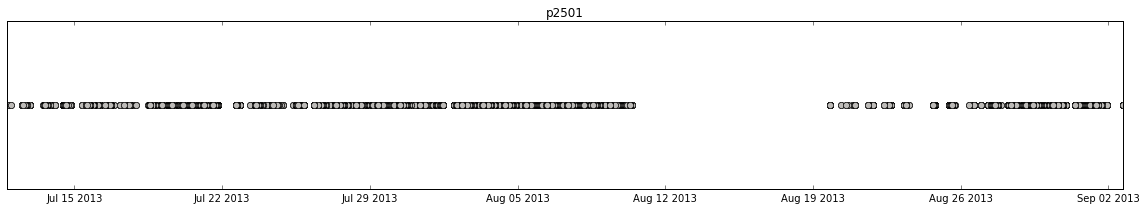

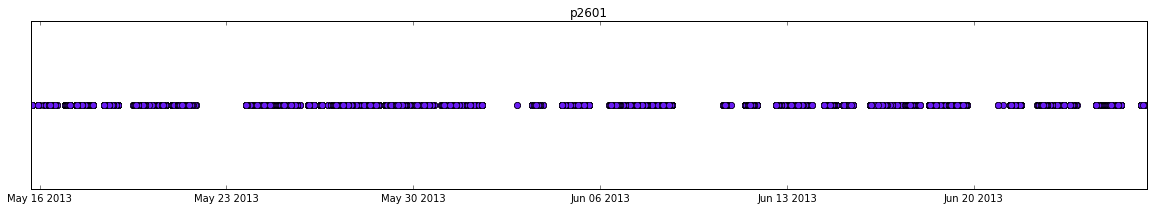

In [52]:
def plot_loc(person, data_color):
        data = pd.read_csv("organized_data/"+ person +"/LOC.txt", error_bad_lines=False, sep=",", header=None, names=["timestamp", "gps_timestamp", "accuracy","altitude","bearing", "speed", "latitude", "longitude"])
        timestamp = data["timestamp"] / 1000
        timestamp = mdates.epoch2num(timestamp)
        
        data_marker = np.ones(data["timestamp"].shape)
        fig, ax = plt.subplots()
        fig.set_size_inches(20, 3)
        ax.set_title(person.format('seaborn'))
        ax.yaxis.set_visible(False)
        
        plt.plot_date(x=timestamp, y=data_marker, color=data_color)
        plt.show()

def load_loc():
    for person in persons:
        plot_loc(person, np.random.rand(3,1))
        
load_loc()

### Battery data availability

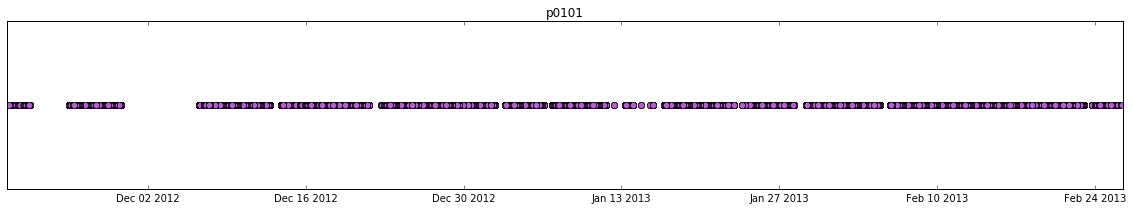

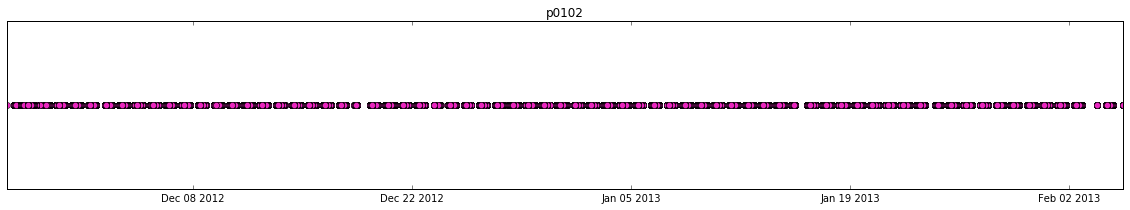

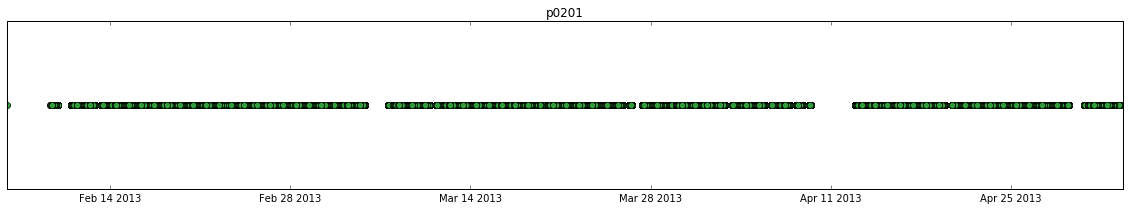

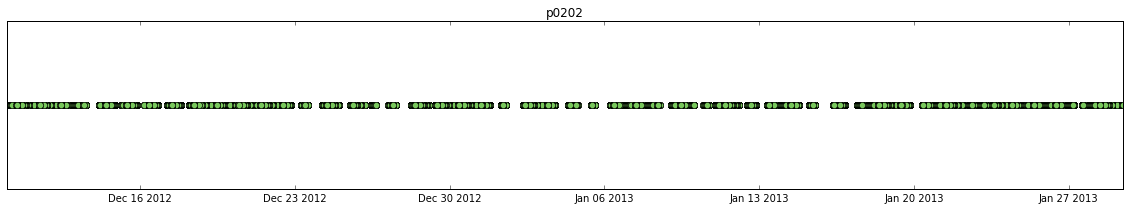

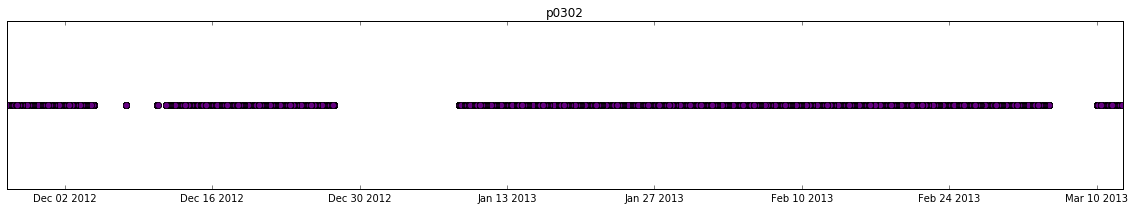

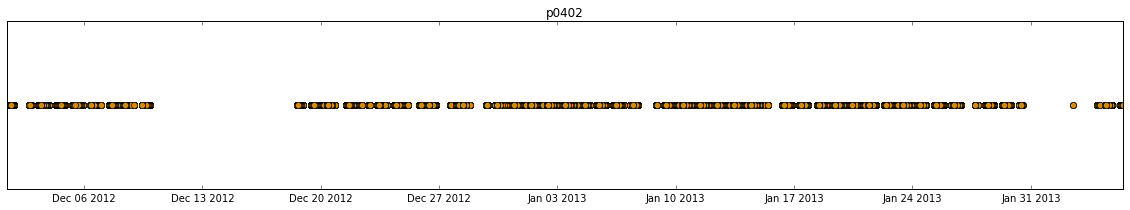

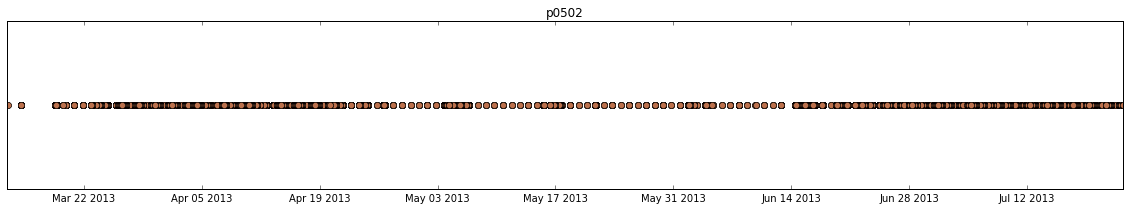

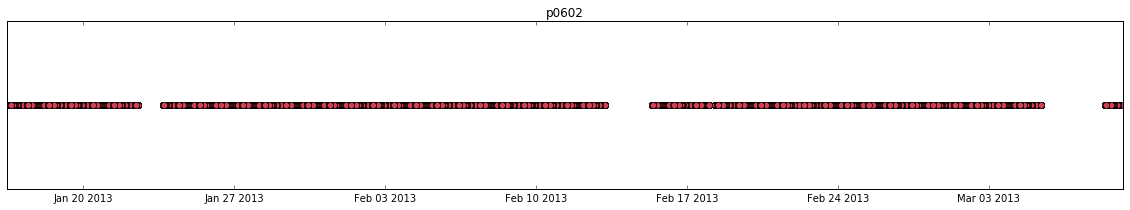

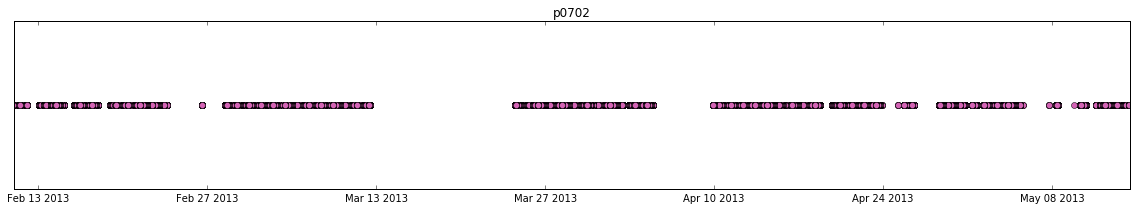

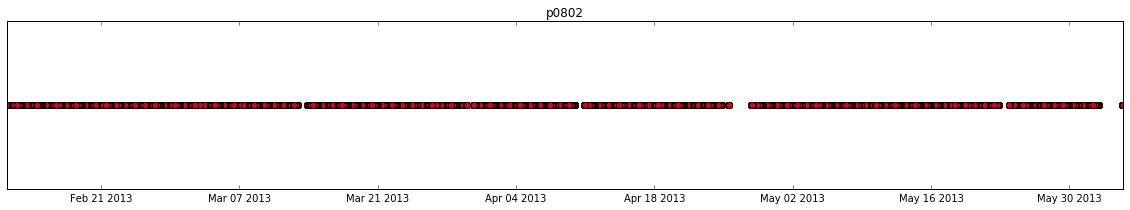

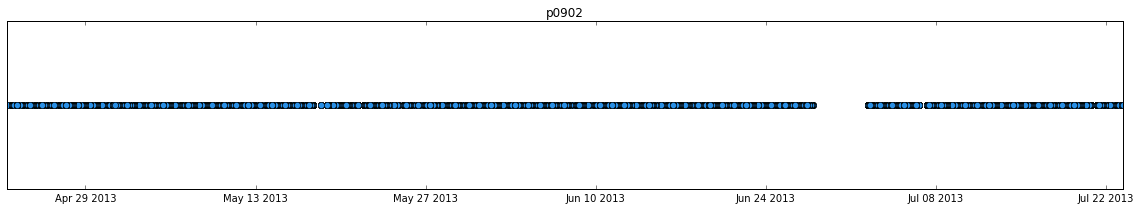

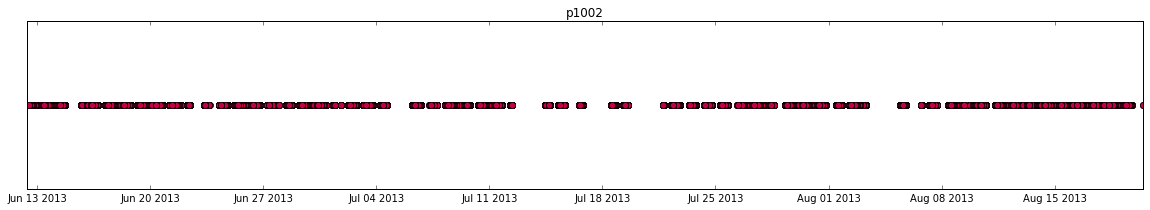

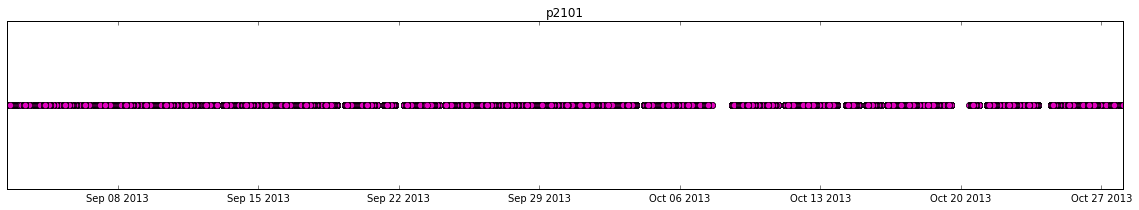

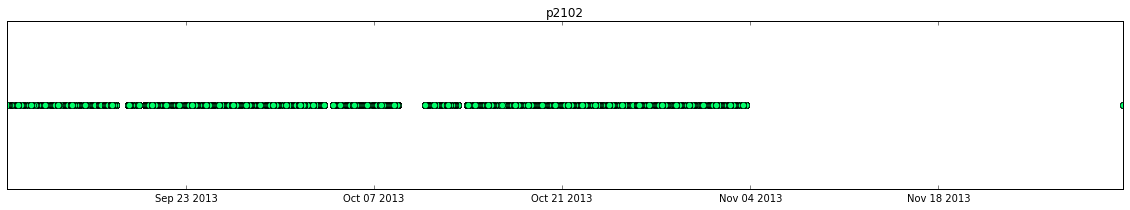

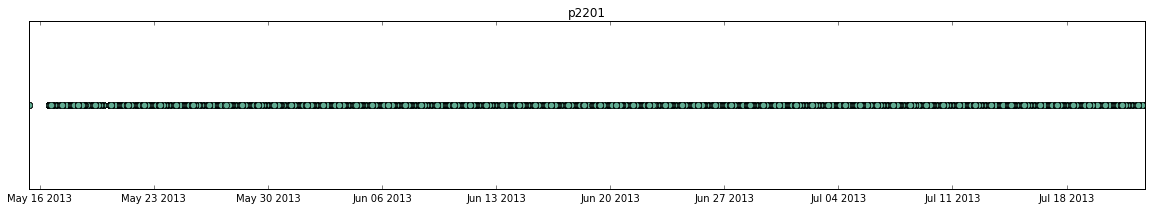

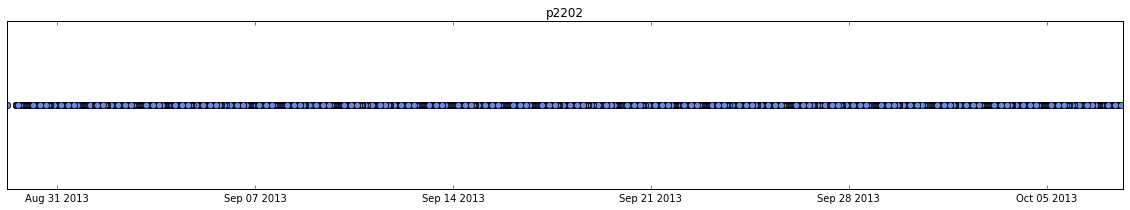

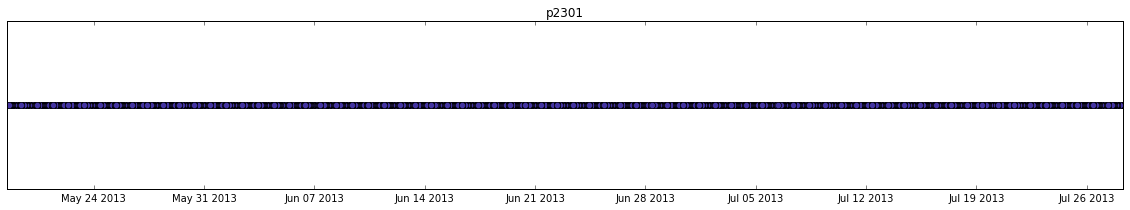

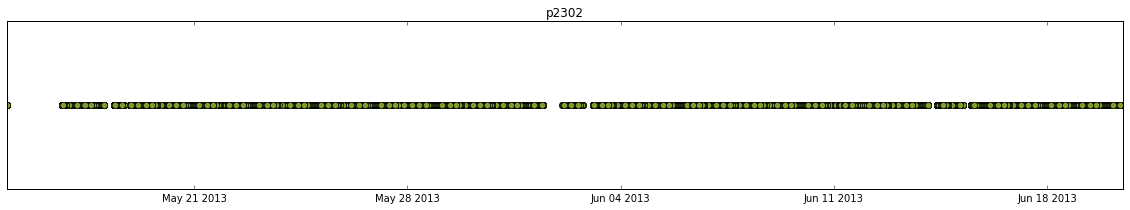

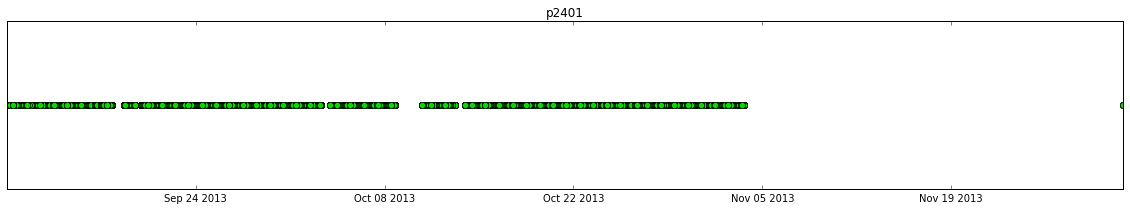

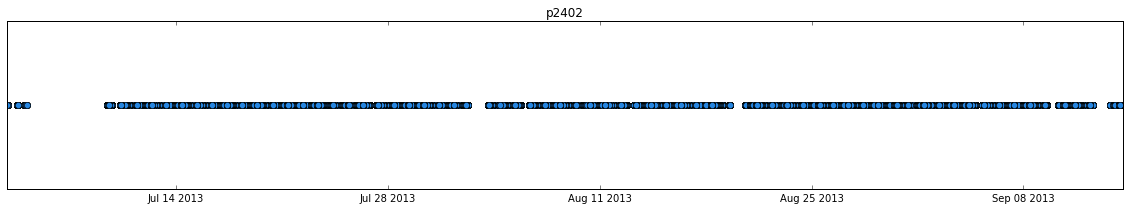

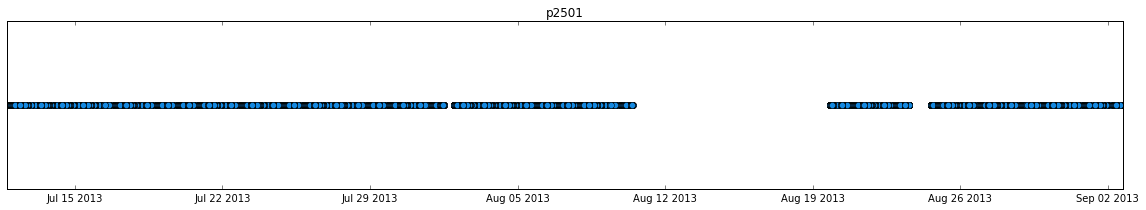

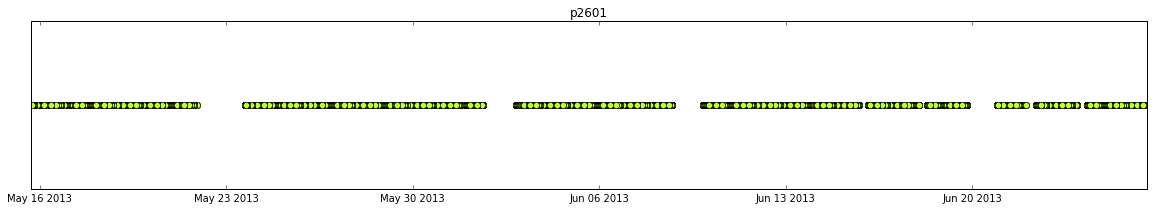

In [78]:
def plot_bat(person, data_color):
        data = pd.read_csv("organized_data/"+ person +"/BAT.txt", error_bad_lines=False, sep=",", header=None, names=["timestamp", "level", "absolute_max","temperature","voltage"])
        timestamp = data["timestamp"] / 1000
        timestamp = mdates.epoch2num(timestamp)
        
        data_marker = np.ones(data["timestamp"].shape)
        fig, ax = plt.subplots()
        fig.set_size_inches(20, 3)
        ax.set_title(person.format('seaborn'))
        ax.yaxis.set_visible(False)
        
        plt.plot_date(x=timestamp, y=data_marker, color=data_color)
        plt.show()

def load_battery():
    for person in persons:
        plot_bat(person, np.random.rand(3,1))
        
load_battery()

### Wifi data availability (Not very useful as only scan start and scan stop status is mostly available)

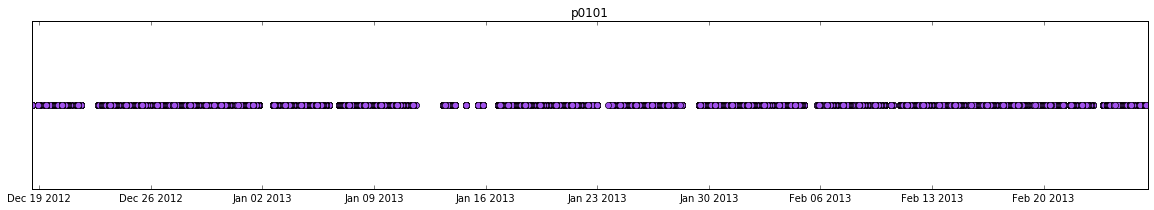

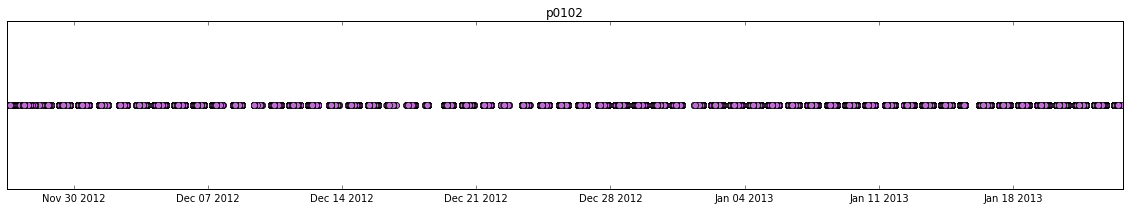

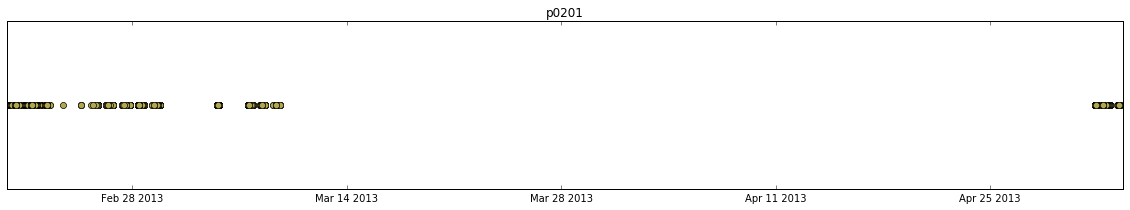

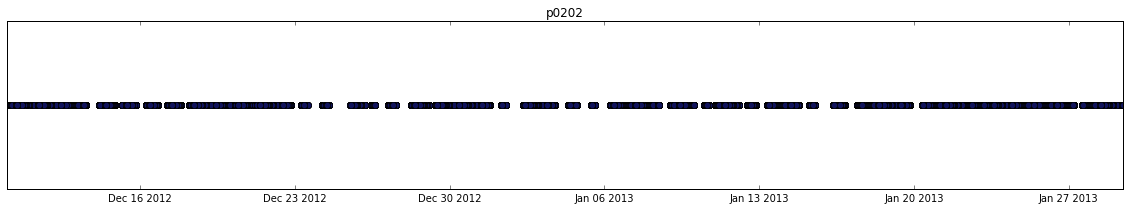

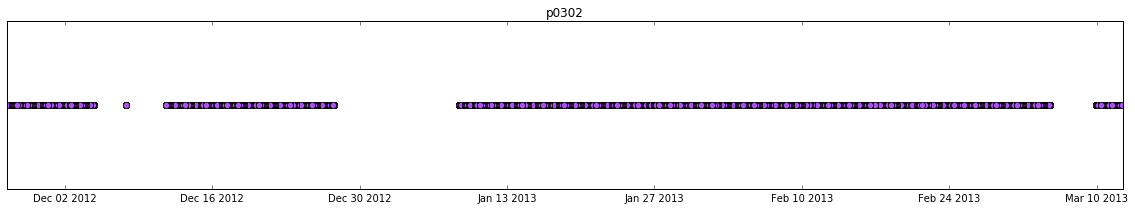

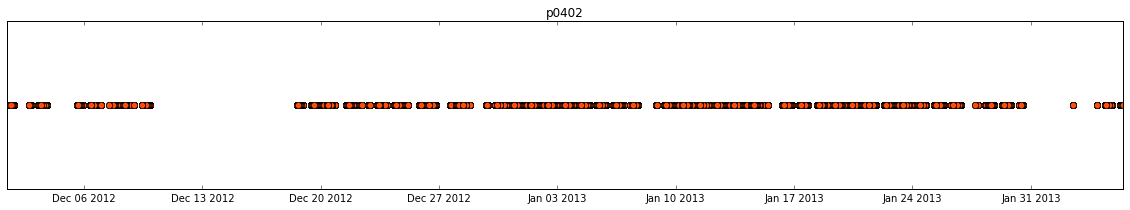

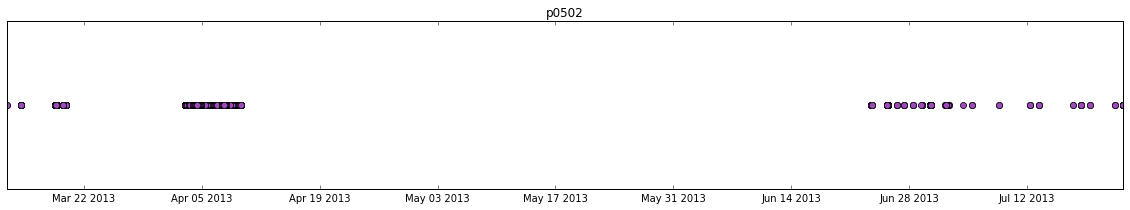

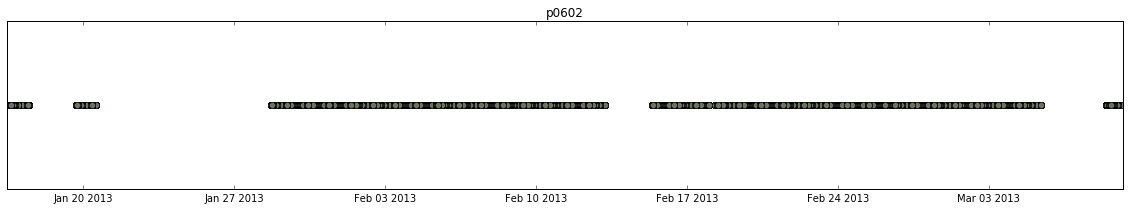

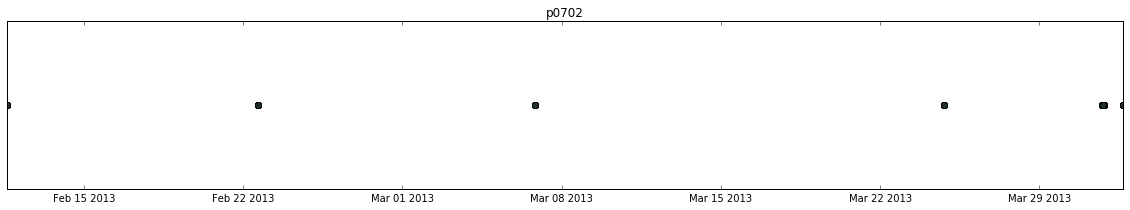

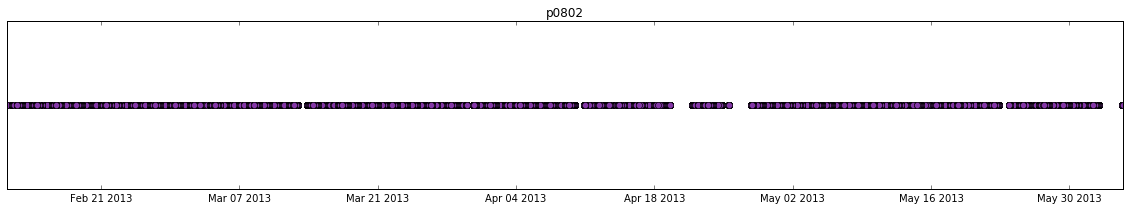

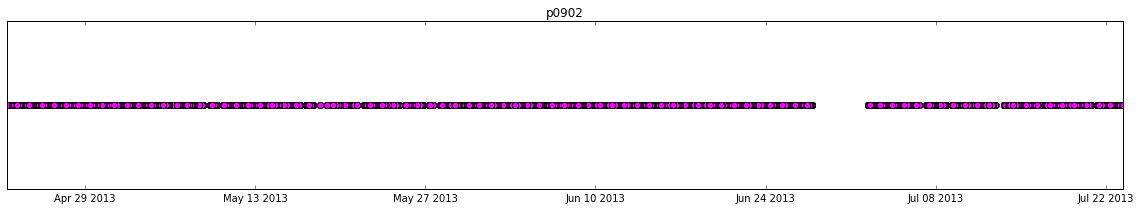

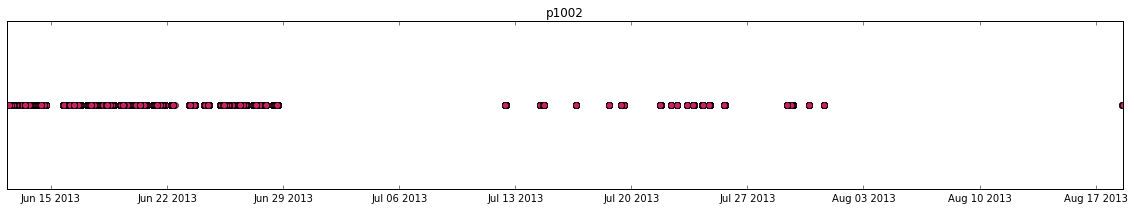

/home/mushtaq/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2862: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


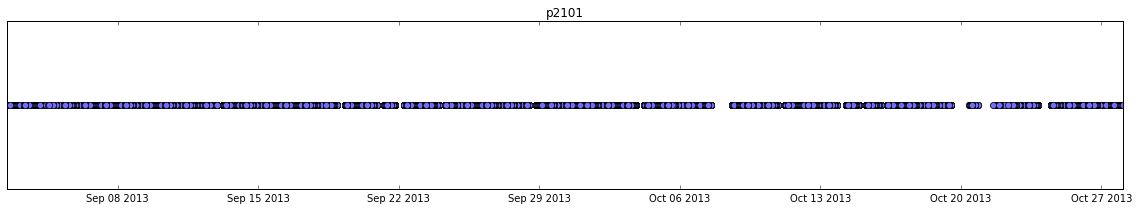

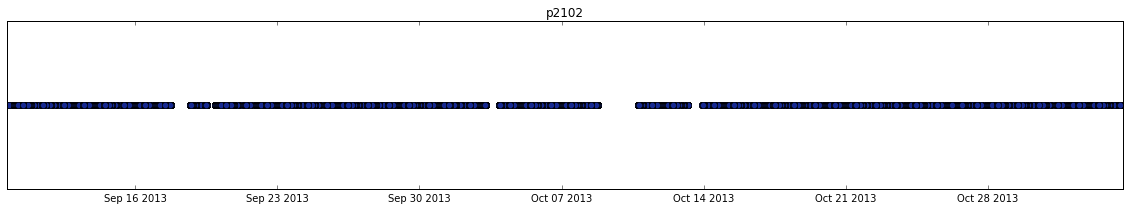

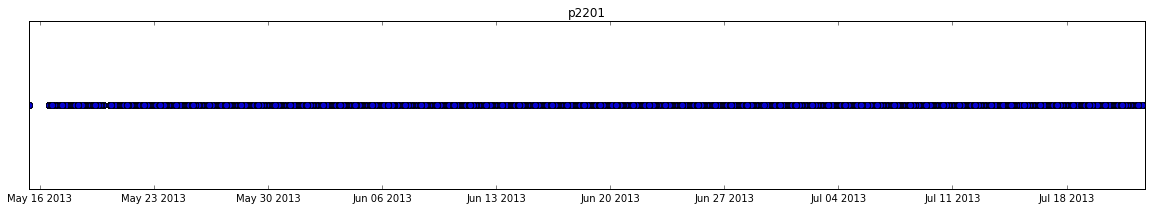

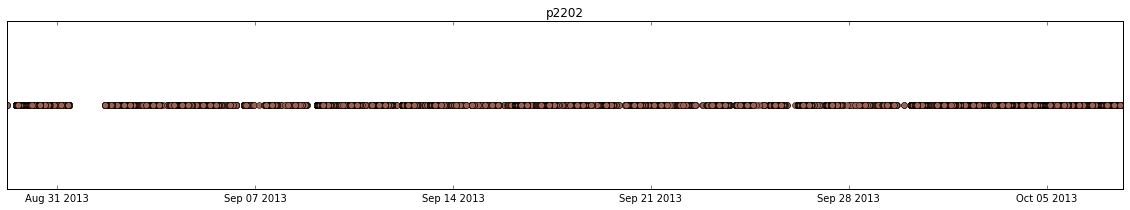

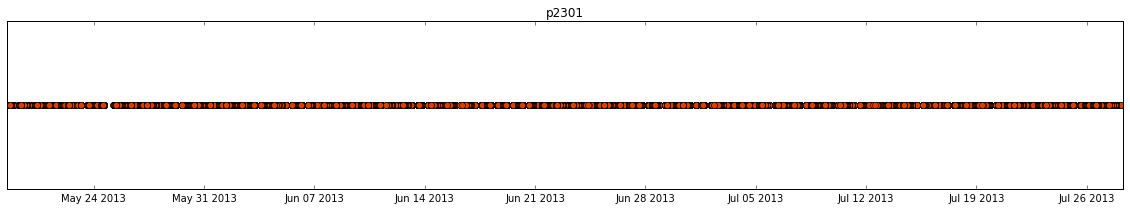

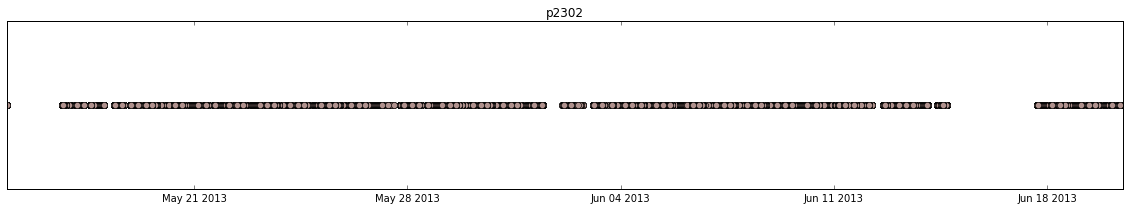

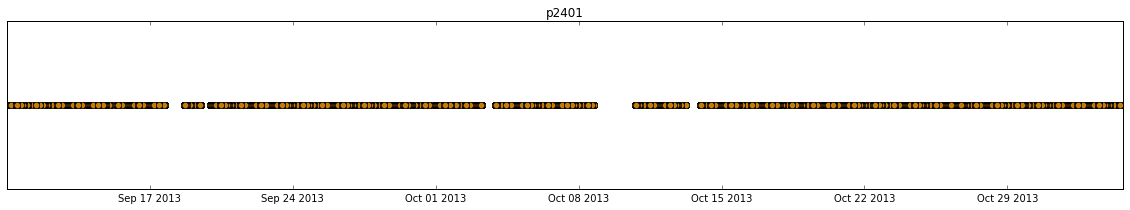

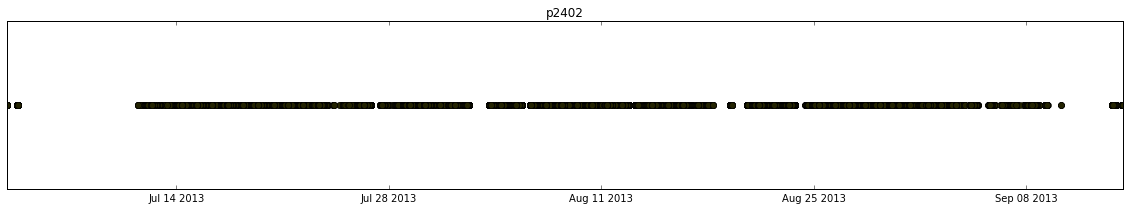

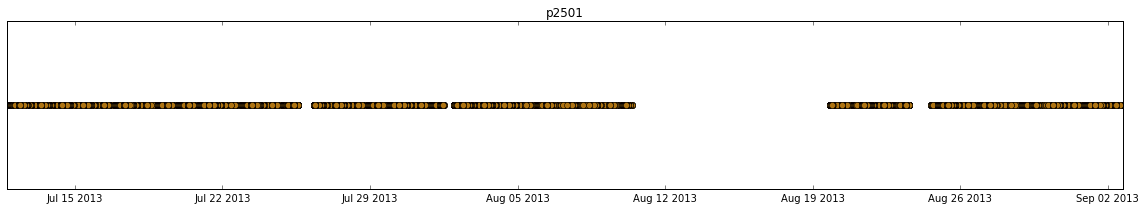

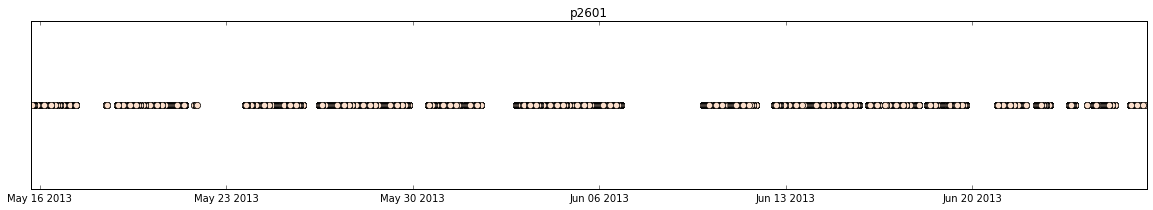

In [10]:
def plot_wifi(person, data_color):
        data = pd.read_csv("organized_data/"+ person +"/WIFI.txt", warn_bad_lines=False ,error_bad_lines=False, sep=",", header=None)
        timestamp = data[0] / 1000
        timestamp = mdates.epoch2num(timestamp)
        
        data_marker = np.ones(data[0].shape)
        fig, ax = plt.subplots()
        fig.set_size_inches(20, 3)
        ax.set_title(person.format('seaborn'))
        ax.yaxis.set_visible(False)
        
        plt.plot_date(x=timestamp, y=data_marker, color=data_color)
        plt.show()

def load_wifi():
    for person in persons:
        plot_wifi(person, np.random.rand(3,1))
        
load_wifi()

### Bluetooth availability data ("p0802","p2301" have inconsistencies. Others mostly have only start stop status)

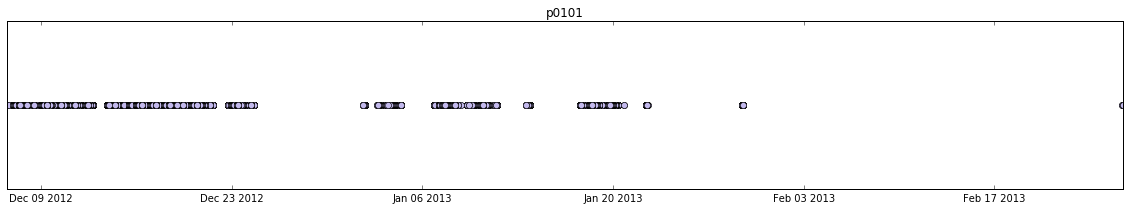

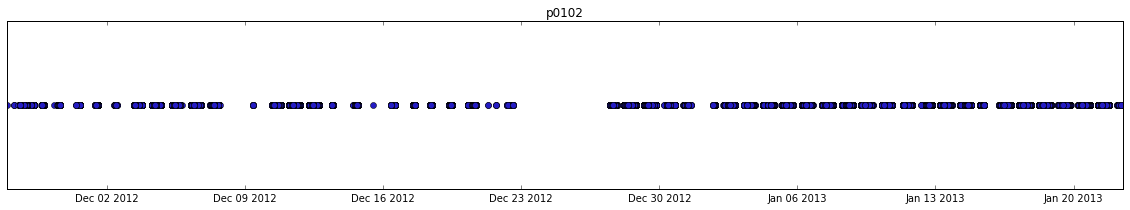

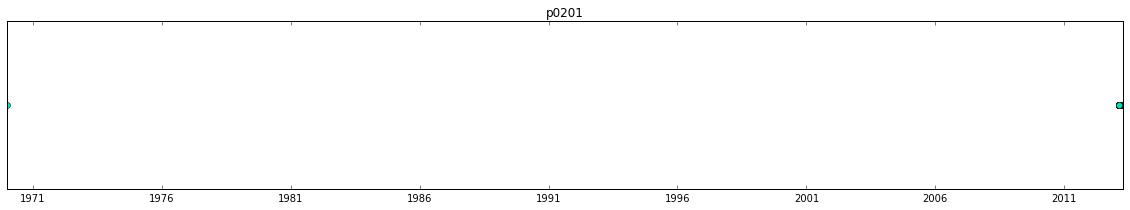

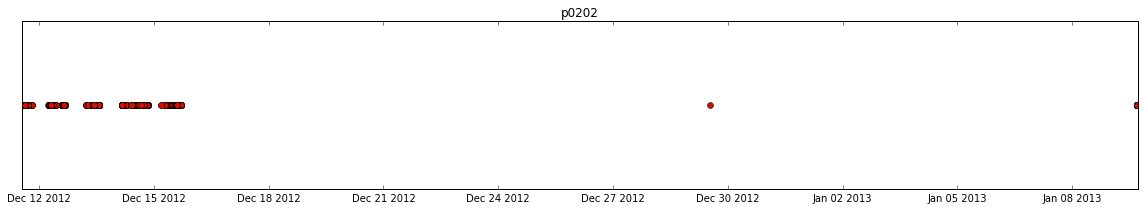

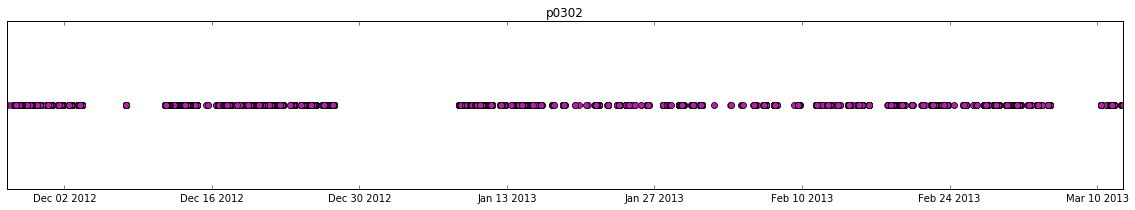

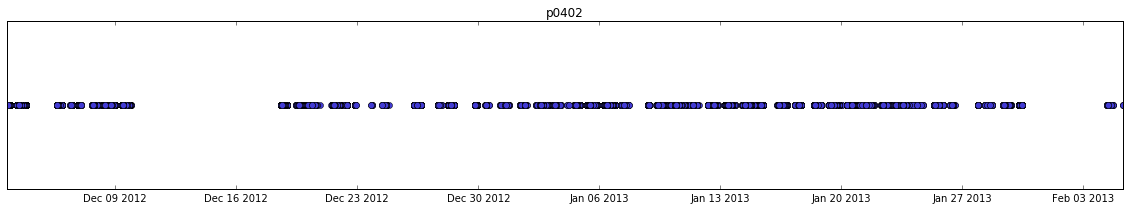

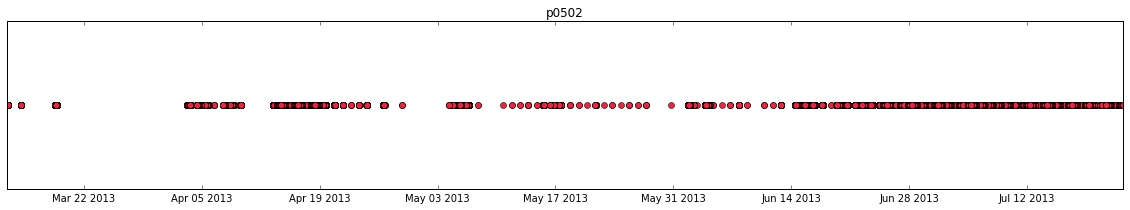

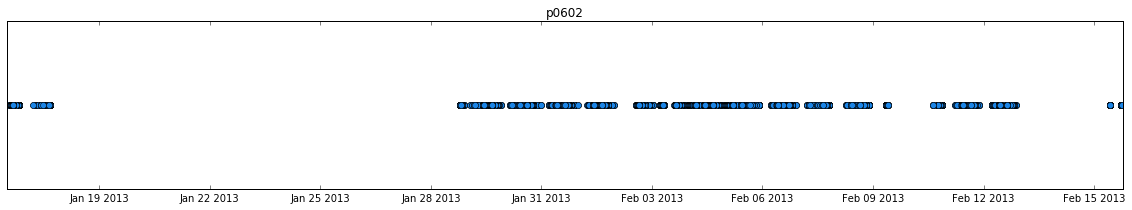

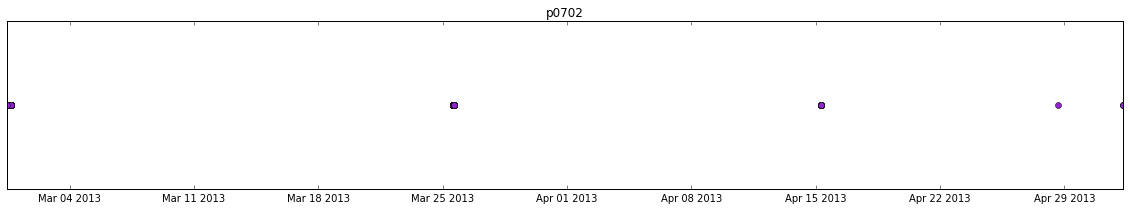

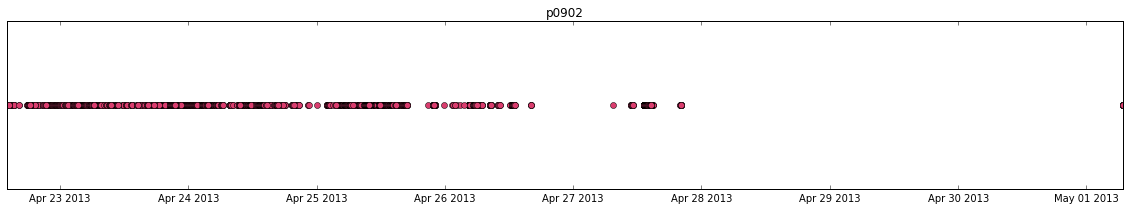

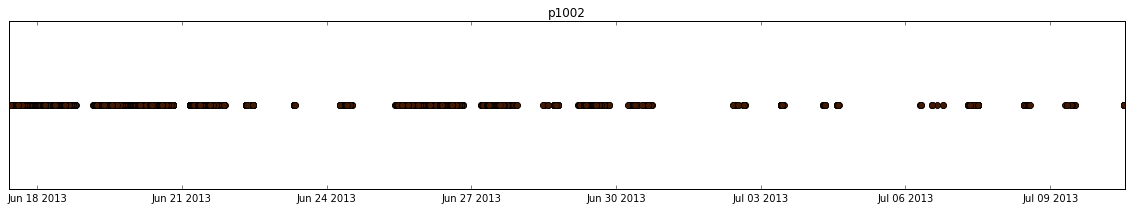

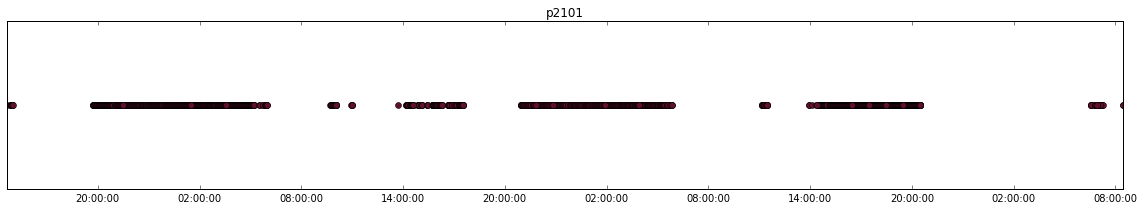

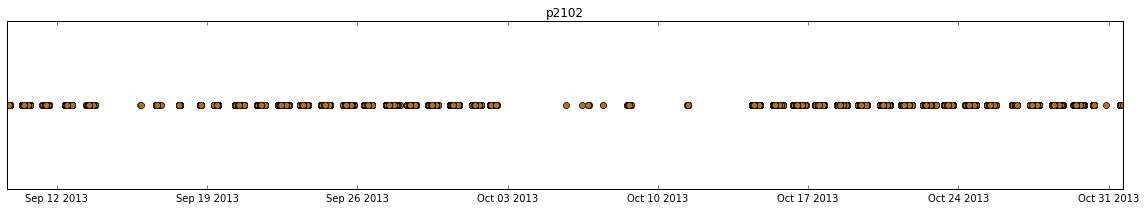

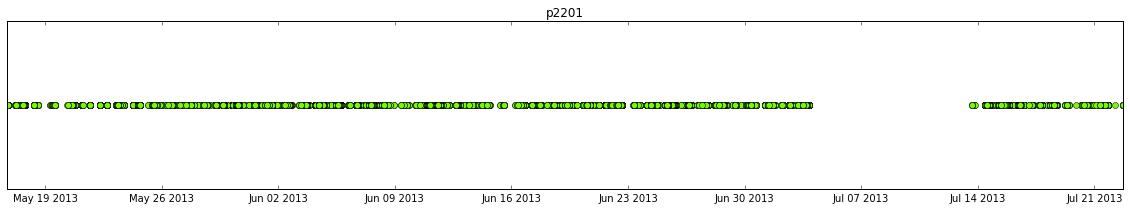

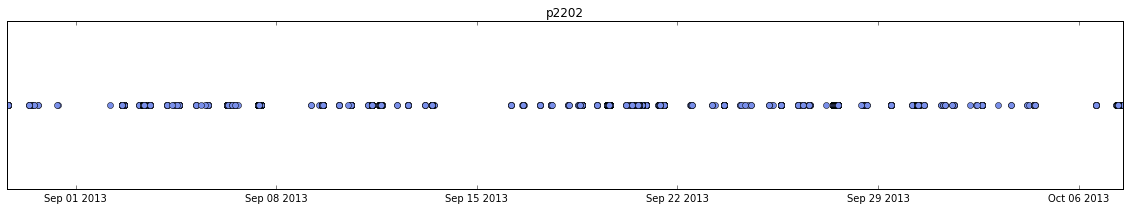

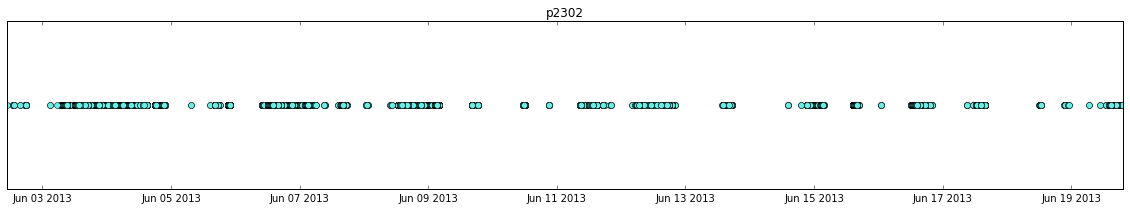

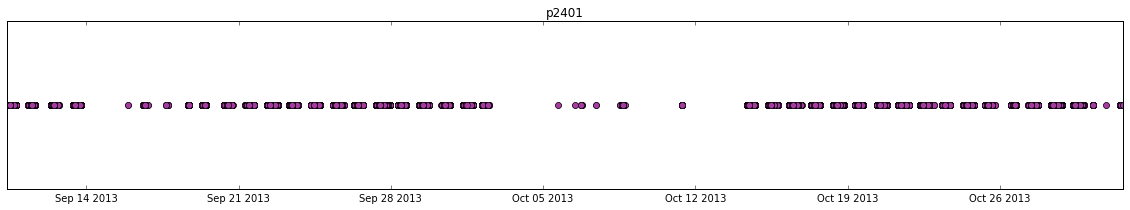

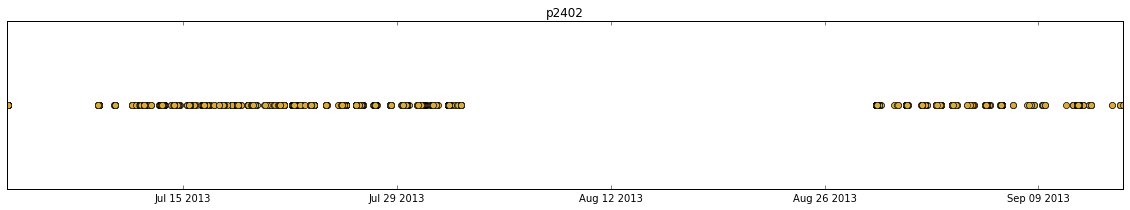

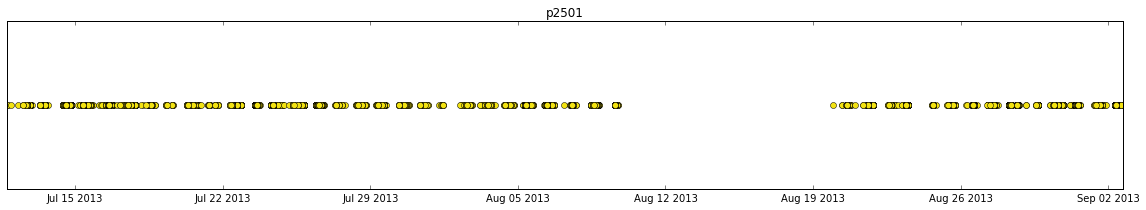

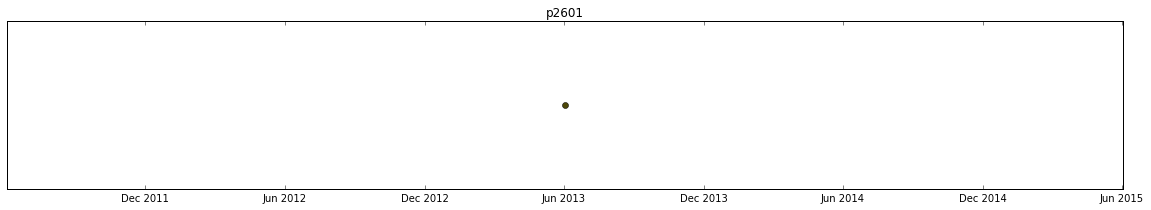

In [32]:
def plot_bt(person, data_color):
        data = pd.read_csv("organized_data/"+ person +"/BLTH.txt", warn_bad_lines=False ,error_bad_lines=False, sep=",", header=None)
        timestamp = data[0] / 1000
        timestamp = mdates.epoch2num(timestamp)
        
        data_marker = np.ones(data[0].shape)
        fig, ax = plt.subplots()
        fig.set_size_inches(20, 3)
        ax.set_title(person.format('seaborn'))
        ax.yaxis.set_visible(False)
        
        plt.plot_date(x=timestamp, y=data_marker, color=data_color)
        plt.show()

def load_bt():
    errors = ["p0802","p2301"]
    for person in persons:
        if not (person in errors):
            plot_bt(person, np.random.rand(3,1))
        
load_bt()

### Meta data availability

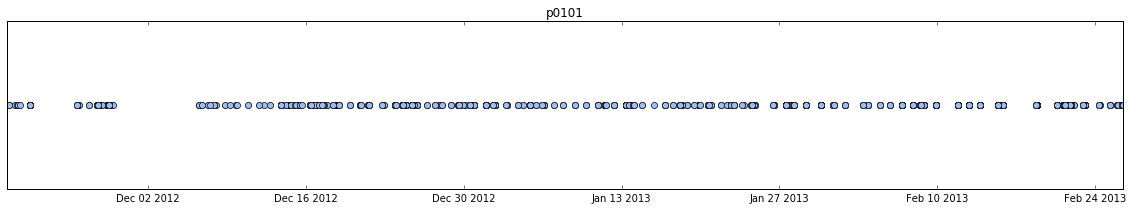

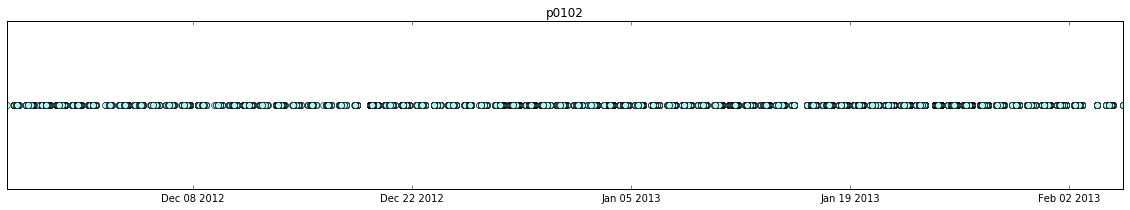

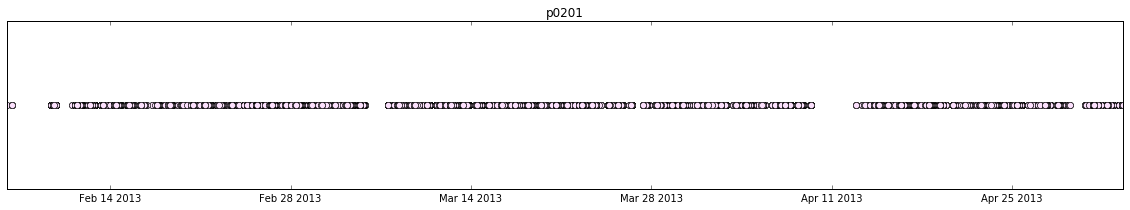

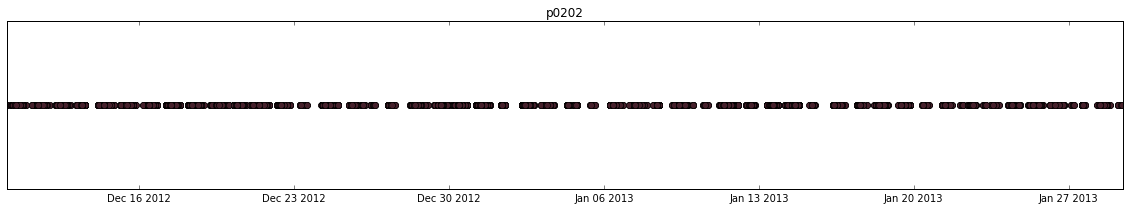

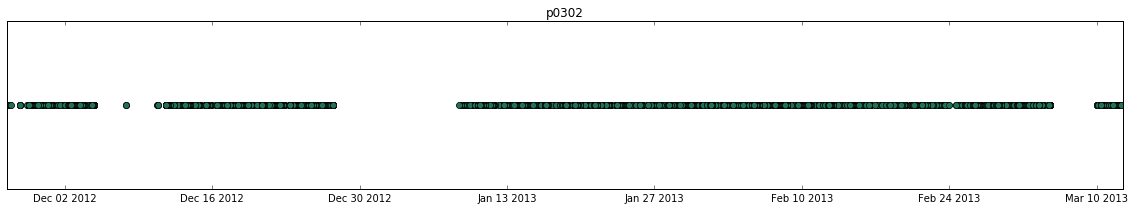

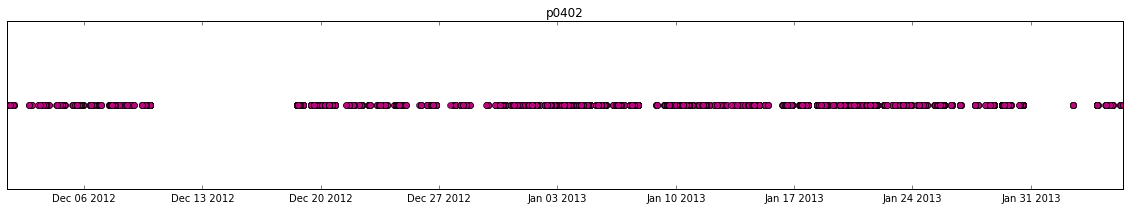

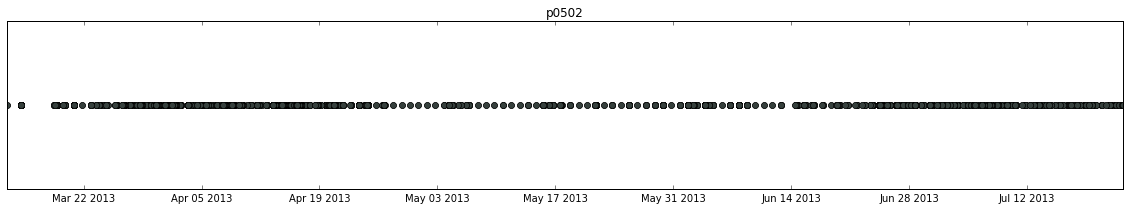

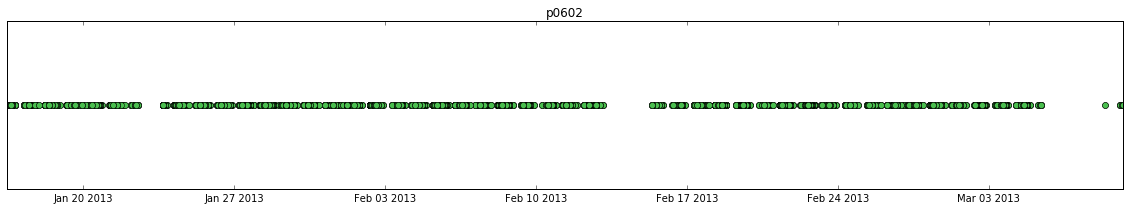

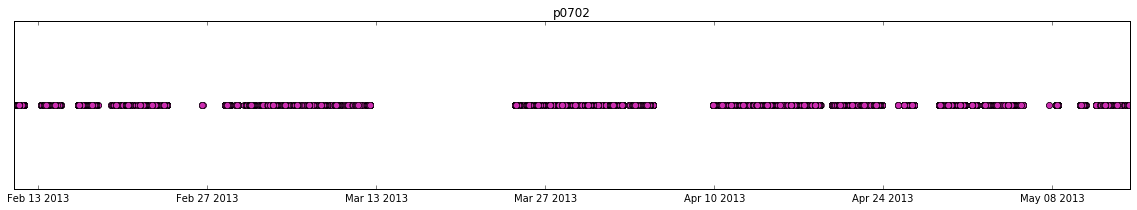

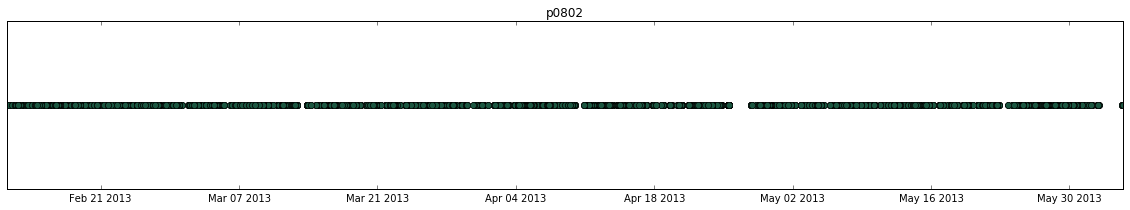

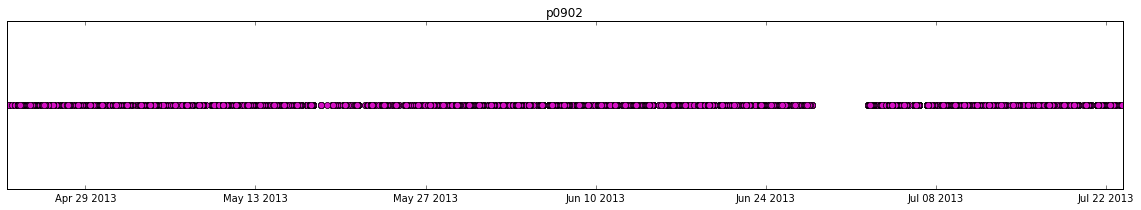

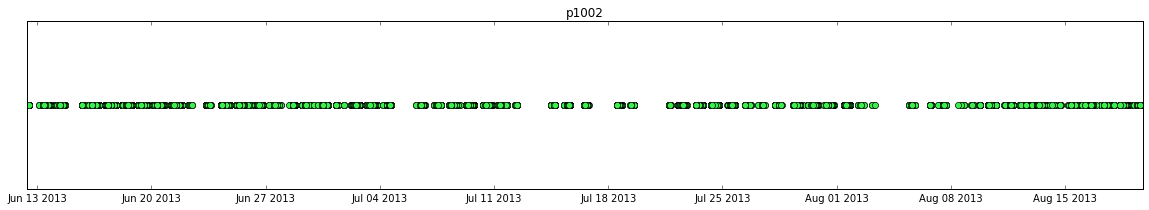

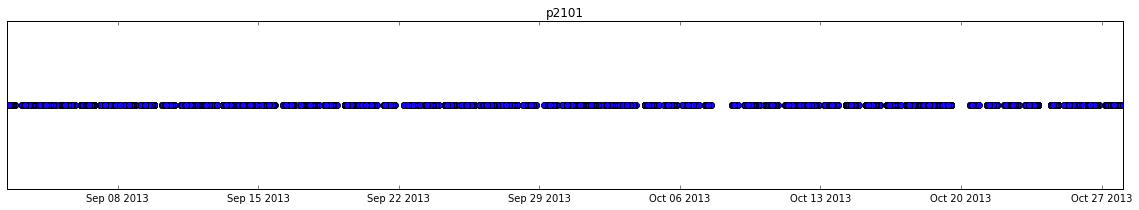

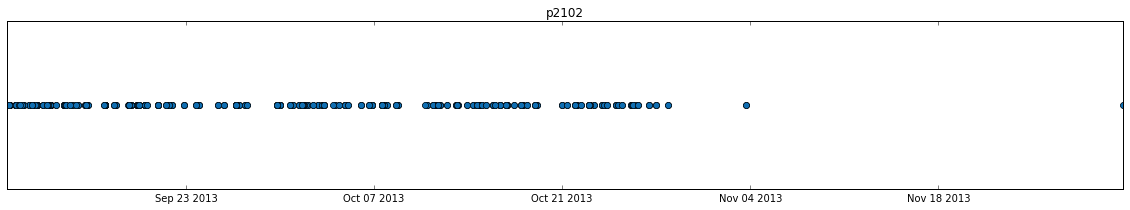

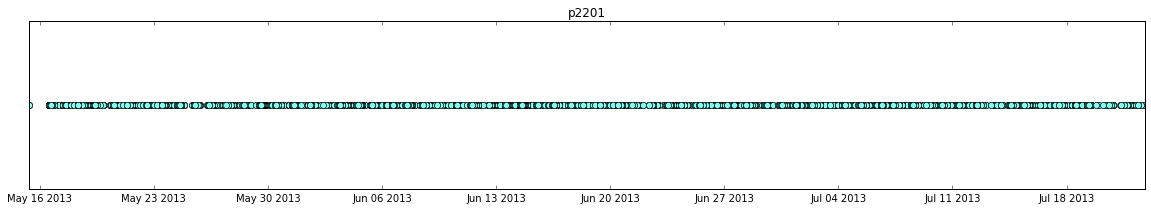

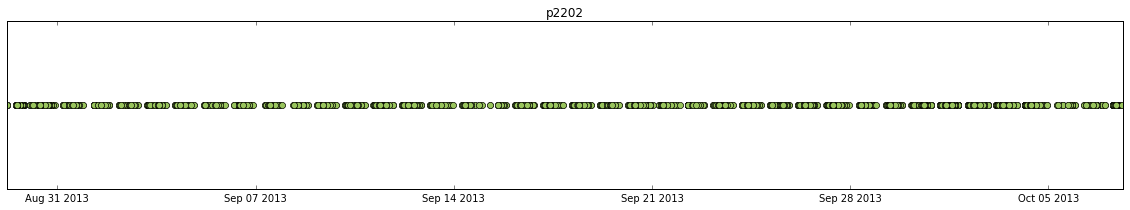

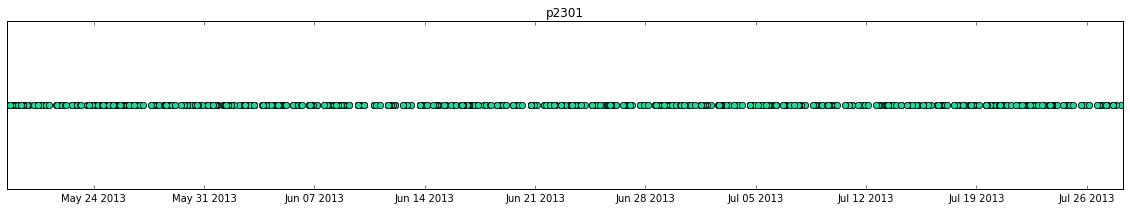

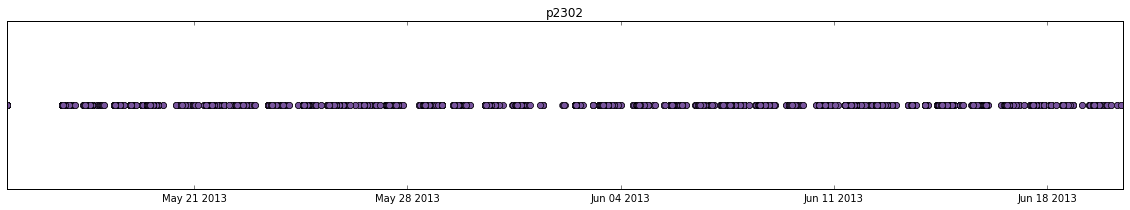

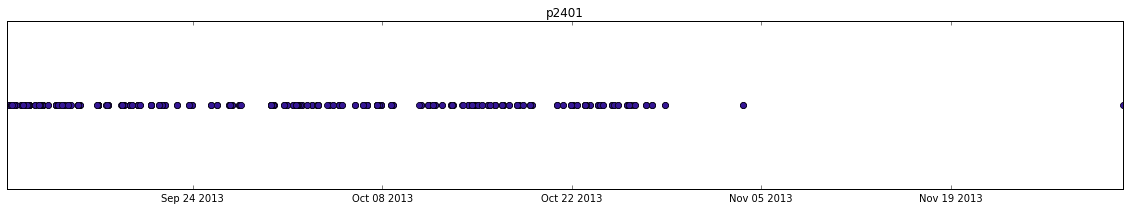

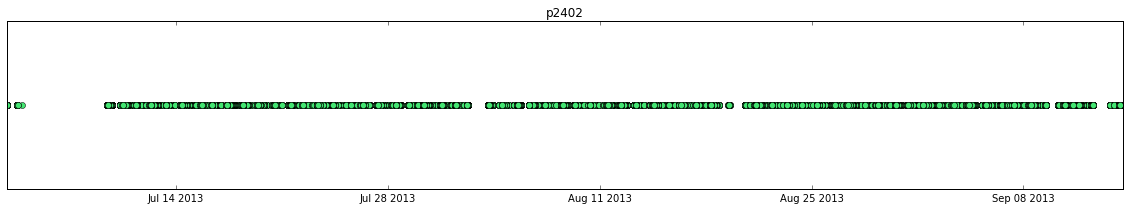

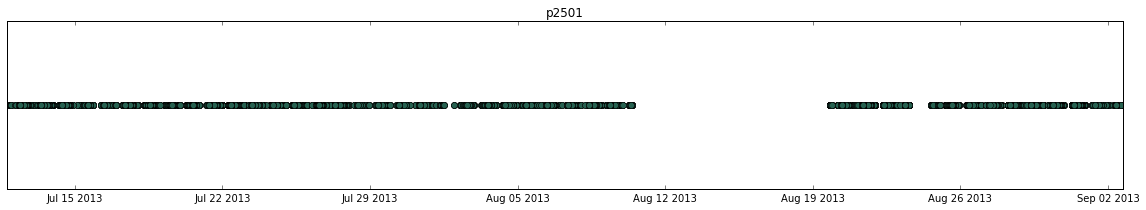

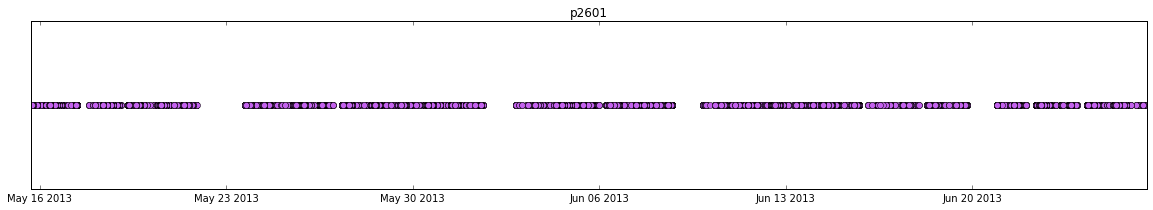

In [34]:
def plot_meta(person, data_color):
        data = pd.read_csv("organized_data/"+ person +"/META.txt", warn_bad_lines=False ,error_bad_lines=False, sep=",", header=None)
        timestamp = data[0] / 1000
        timestamp = mdates.epoch2num(timestamp)
        
        data_marker = np.ones(data[0].shape)
        fig, ax = plt.subplots()
        fig.set_size_inches(20, 3)
        ax.set_title(person.format('seaborn'))
        ax.yaxis.set_visible(False)
        
        plt.plot_date(x=timestamp, y=data_marker, color=data_color)
        plt.show()

def load_meta():
    errors = []
    for person in persons:
        if not (person in errors):
            plot_meta(person, np.random.rand(3,1))
        
load_meta()

### Accelerometer data availability (dirty datapoints exist)

gathering for personp0101


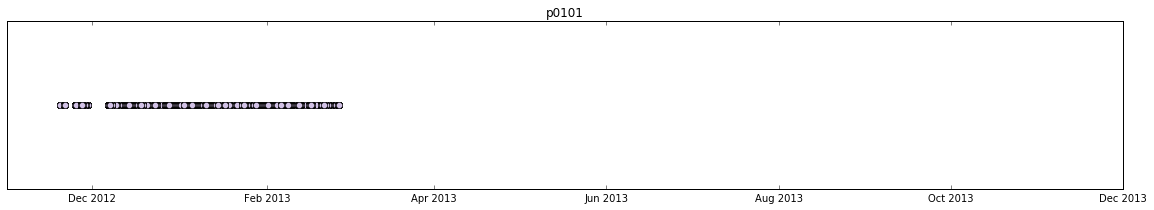

gathering for personp0102


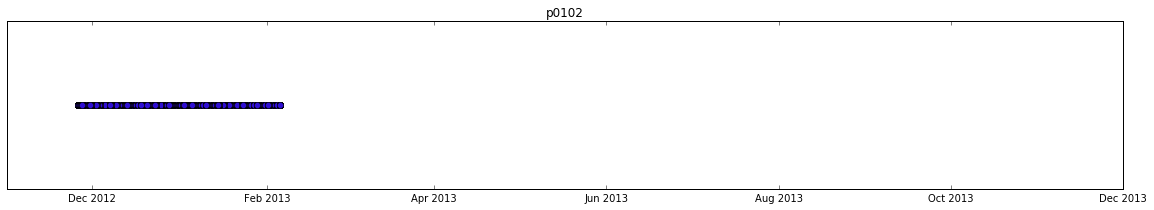

gathering for personp0201


/home/mushtaq/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2862: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


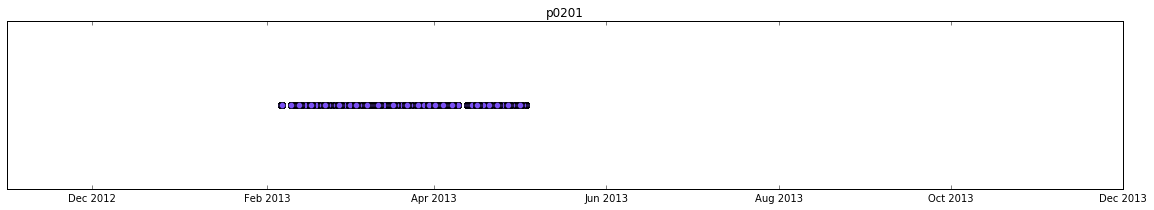

gathering for personp0202


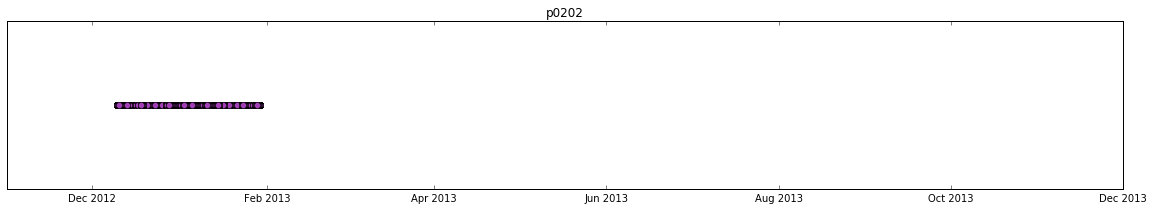

gathering for personp0302


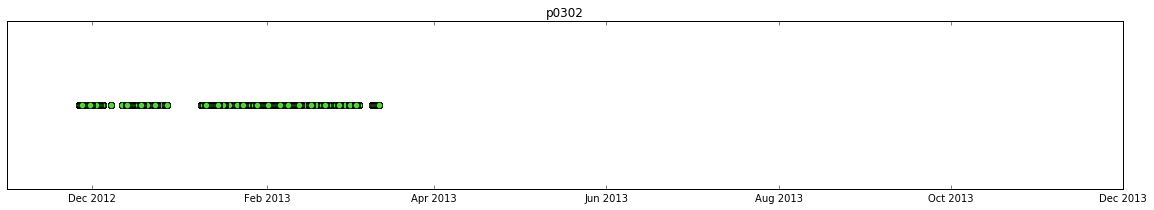

gathering for personp0402


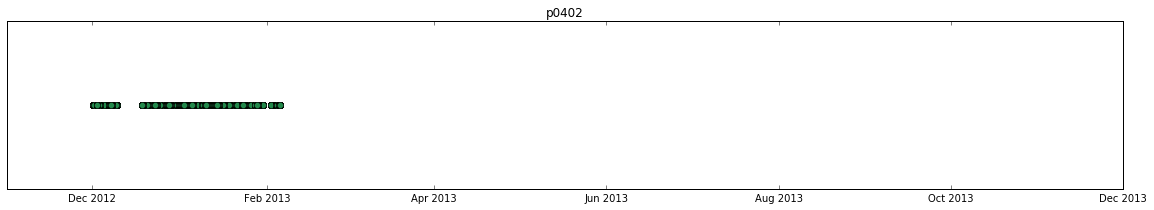

gathering for personp0502


/home/mushtaq/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2862: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


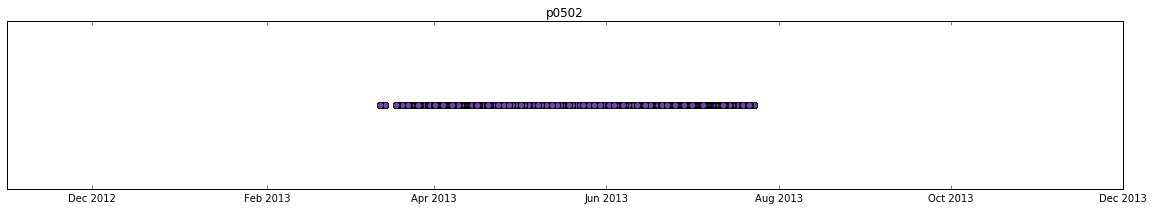

gathering for personp0602


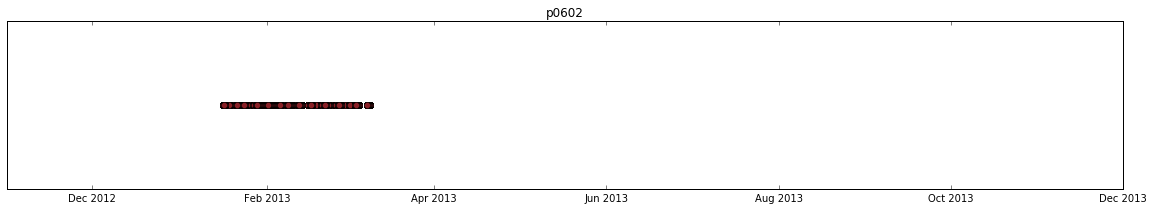

gathering for personp0702


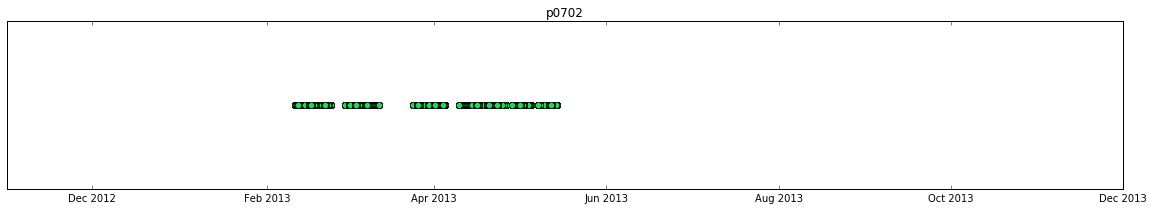

gathering for personp0802


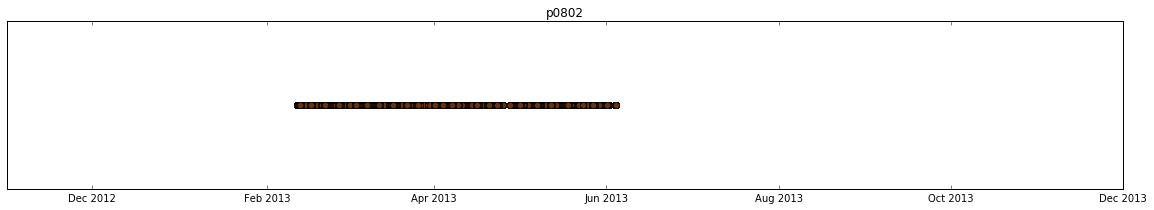

gathering for personp0902


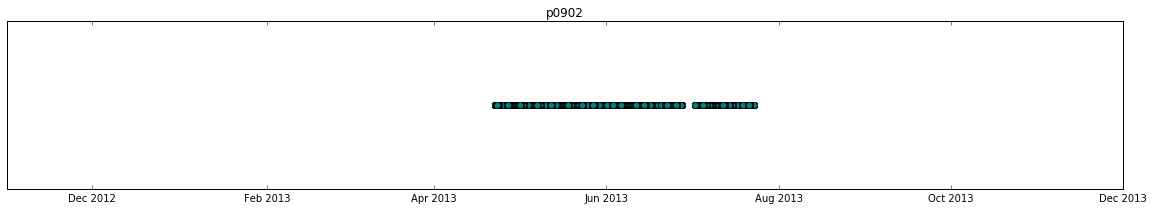

gathering for personp1002


/home/mushtaq/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2862: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
def plot_acc(person, data_color):  
    data = pd.read_csv("organized_data/"+person+"/ACC.txt", warn_bad_lines=False, error_bad_lines=False, sep=",", header=None, names=["sensor_time", "timestamp", "x","y","z"])
    timestamp = data["timestamp"] / 1000
    timestamp = mdates.epoch2num(timestamp)

    data_marker = np.ones(data["timestamp"].shape)
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 3)
    ax.set_title(person.format('seaborn'))
    ax.set_xlim([datetime.date(2012, 11, 1), datetime.date(2013, 12, 1)])
    ax.yaxis.set_visible(False)

    plt.plot_date(x=timestamp, y=data_marker, color=data_color)
    plt.show()

def load_acc():
    for person in persons:
        print("gathering for person" + person)
        plot_acc(person, np.random.rand(3,1))
    
load_acc()

### Magnetometer data availability

In [ ]:
def plot_mag(person, data_color):
        data = pd.read_csv("organized_data/"+ person +"/MAG_min.txt", warn_bad_lines=False, error_bad_lines=False, sep=",", header=None, names=["sensor_time", "timestamp", "x","y","z"])
        timestamp = data["timestamp"] / 1000
        timestamp = mdates.epoch2num(timestamp)
        datetime.datetime.fromtimestamp(1347517370).strftime('%c')
        
        data_marker = np.ones(data["timestamp"].shape)
        fig, ax = plt.subplots()
        fig.set_size_inches(20, 3)
        ax.set_title(person.format('seaborn'))
        ax.yaxis.set_visible(False)
        
        plt.plot_date(x=timestamp, y=data_marker, color=data_color)
        plt.show()

def load_magnetometer():
    for person in persons:
        plot_mag(person, np.random.rand(3,1))
        
load_magnetometer()